### Импорты

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from geopy.distance import geodesic
from datetime import datetime
from IPython.display import display

### Загрузка данных

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/output.csv')

df_1.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"1-к. квартира, 42 м², 9/10 эт.",25600000,"Москва, Корабельная ул., 5А",NaN,Пользователь,Пользователь,7330910018,1.0,42,17 м²,...,подземная,Ривер Парк Коломенское,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.69928360,55.68554688",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
1,"1-к. квартира, 40 м², 17/17 эт.",10200000,"Москва, Цимлянская ул., 28",NaN,Пользователь,Пользователь,7354848020,1.0,40,19 м²,...,открытая во дворе,Жк Город Звёзд,NaN,возможна ипотека,альтернативная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.76729500,55.66906200",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
2,"1-к. квартира, 44 м², 3/22 эт.",17990000,"Москва, ул. Мельникова, 2",NaN,Пользователь,Пользователь,7352275772,1.0,44,28 м²,...,"подземная, за шлагбаумом во дворе",Жк Пехра,а с единым подземным паркингом. Одной из ключе...,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.67670822,55.72765350",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
3,"1-к. апартаменты, 46,5 м², 1/6 эт.",11350000,Москва,NaN,Пользователь,Пользователь,7260672164,1.0,5,NaN,...,NaN,Жк Пехра,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
4,"1-к. квартира, 43 м², 22/30 эт.",16700000,"Москва, Ореховый б-р, 24к4",NaN,Пользователь,Пользователь,7237384615,1.0,43,24 м²,...,"подземная, за шлагбаумом во дворе",Жк Рублевский Квартал,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.75111600,55.61260900",https://www.avito.ru/moskva/kvartiry/1-k._kvar...


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/output_2.csv')

df_2.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"Квартира-студия, 10 м², 1/9 эт.",4100000,"Москва, Планерная ул., 26с1",26 апреля 07:43,Свои Места,Свои Места,7350998753,NaN,10,NaN,...,открытая во дворе,Жк Семеновский Парк,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.44047000,55.86947600",https://www.avito.ru/moskva/kvartiry/kvartira-...
1,"Квартира-студия, 11 м², 1/12 эт.",3300000,"Москва, ул. Корнейчука, 55",NaN,ПРАВИЛЬНЫЙ ВЫБОР,ПРАВИЛЬНЫЙ ВЫБОР,7354701876,NaN,11,NaN,...,открытая во дворе,Жк Семеновский Парк,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.62489400,55.89186000",https://www.avito.ru/moskva/kvartiry/kvartira-...
2,"Квартира-студия, 12 м², 1/9 эт.",4500000,"Москва, Планерная ул., 26с1",NaN,ПРАВИЛЬНЫЙ ВЫБОР,ПРАВИЛЬНЫЙ ВЫБОР,7322277639,NaN,12,NaN,...,открытая во дворе,Жк Семеновский Парк,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.44046783,55.86947632",https://www.avito.ru/moskva/kvartiry/kvartira-...
3,"Апартаменты-студия, 22 м², 1/9 эт.",4950000,"Москва, Космодамианская наб., 4/22кВ",2 мая 17:36,Свои Места,Свои Места,4439104145,NaN,22,NaN,...,за шлагбаумом во дворе,Жк Преображение,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.63883500,55.74506800",https://www.avito.ru/moskva/kvartiry/apartamen...
4,"Апартаменты-студия, 13,4 м², 5/5 эт.",3324000,"Москва, Автозаводская ул., 17к2",28 апреля 11:10,Комфорт Хаус,Комфорт Хаус,7300939483,NaN,4,8.1 м²,...,открытая во дворе,Жк Преображение,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.65428700,55.70416400",https://www.avito.ru/moskva/kvartiry/apartamen...


In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/output_3.csv')

df_3.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"1-к. квартира, 42 м², 9/10 эт.",25600000,"Москва, Корабельная ул., 5А",NaN,Пользователь,Пользователь,7330910018,1.0,42,17 м²,...,подземная,Ривер Парк Коломенское,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.69928360,55.68554688",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
1,"1-к. квартира, 40 м², 17/17 эт.",10200000,"Москва, Цимлянская ул., 28",NaN,Пользователь,Пользователь,7354848020,1.0,40,19 м²,...,открытая во дворе,Жк Город Звёзд,NaN,возможна ипотека,альтернативная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.76729500,55.66906200",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
2,"1-к. квартира, 44 м², 3/22 эт.",17990000,"Москва, ул. Мельникова, 2",NaN,Пользователь,Пользователь,7352275772,1.0,44,28 м²,...,"подземная, за шлагбаумом во дворе",Жк Пехра,а с единым подземным паркингом. Одной из ключе...,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.67670822,55.72765350",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
3,"1-к. апартаменты, 46,5 м², 1/6 эт.",11350000,Москва,NaN,Пользователь,Пользователь,7260672164,1.0,5,NaN,...,NaN,Жк Пехра,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
4,"1-к. квартира, 43 м², 22/30 эт.",16700000,"Москва, Ореховый б-р, 24к4",NaN,Пользователь,Пользователь,7237384615,1.0,43,24 м²,...,"подземная, за шлагбаумом во дворе",Жк Рублевский Квартал,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.75111600,55.61260900",https://www.avito.ru/moskva/kvartiry/1-k._kvar...


In [ ]:
df_4 = pd.read_csv('/content/drive/MyDrive/output_4.csv')

df_4.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"3-к. квартира, 108 м², 9/18 эт.",44900000,"Москва, Шмитовский пр., 39к8",7 мая 19:01,Unistroy,Unistroy,4784379399,3.0,108,83.8 м²,...,подземная,Жк Сказочный Лес,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.52629500,55.75166500",https://www.avito.ru/moskva/kvartiry/3-k._kvar...
1,"3-к. квартира, 100 м², 3/7 эт.",135000000,"Москва, Садовническая ул., 57с2",7 мая 01:25,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,3810934008,3.0,100,NaN,...,подземная,Wine House,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.64123400,55.73997500",https://www.avito.ru/moskva/kvartiry/3-k._kvar...
2,"3-к. апартаменты, 68,2 м², 9/32 эт.",59000000,"Москва, Поклонная ул., 9",10 мая 10:30,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,4642533610,3.0,2,NaN,...,подземная,Поклонная 9,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.52532400,55.73433400",https://www.avito.ru/moskva/kvartiry/3-k._apar...
3,"2-к. квартира, 63 м², 14/16 эт.",29900000,"Москва, ул. 26 Бакинских Комиссаров, 8к6",NaN,Михаил,Михаил,7272858664,2.0,63,33 м²,...,открытая во дворе,Жк Гармония Парк,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.49356000,55.66121700",https://www.avito.ru/moskva/kvartiry/2-k._kvar...
4,"5-к. квартира, 135 м², 5/14 эт.",80000000,"Москва, Минская ул., 1ГсА",28 апреля 18:33,Soul Estate,Soul Estate,4148041165,5.0,135,NaN,...,подземная,Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.50236300,55.71575800",https://www.avito.ru/moskva/kvartiry/5-k._kvar...


In [ ]:
df_5 = pd.read_csv('/content/drive/MyDrive/output_5.csv')

df_5.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"2-к. квартира, 83,9 м², 16/23 эт.",48500000,"Москва, Гжатская ул., 5к4",7 мая 00:24,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,7234121291,2,9,NaN,...,подземная,Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.43711000,55.71351700",https://www.avito.ru/moskva/kvartiry/2-k._kvar...
1,"2-к. квартира, 55,7 м², 2/9 эт.",15900000,"Москва, ул. Фомичёвой, 7к2",NaN,Пользователь,Пользователь,7356095870,2,7,27 м²,...,открытая во дворе,Жк Маяковский Воронеж,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.44236374,55.85522842",https://www.avito.ru/moskva/kvartiry/2-k._kvar...
2,"2-к. квартира, 54 м², 12/17 эт.",16400000,"Москва, Волоцкой пер., 7к1",NaN,Пользователь,Пользователь,7387433907,2,54,33 м²,...,открытая во дворе,Жк Гармония Парк,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.35286429,55.83521163",https://www.avito.ru/moskva/kvartiry/2-k._kvar...
3,"2-к. квартира, 52 м², 17/34 эт.",53000000,"Москва, Поклонная ул., 9",NaN,ВСЕ НАЧИНАЕТСЯ С МЕЧТЫ,ВСЕ НАЧИНАЕТСЯ С МЕЧТЫ,7329388622,2,52,NaN,...,подземная,Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.52532400,55.73433400",https://www.avito.ru/moskva/kvartiry/2-k._kvar...
4,"2-к. квартира, 55 м², 37/58 эт.",36050100,"Москва, Западный административный округ, район...",NaN,SOKOL REALTY,SOKOL REALTY,7353822401,2,55,NaN,...,подземная,Жк Рублевский Квартал,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.50977000,55.74222000",https://www.avito.ru/moskva/kvartiry/2-k._kvar...


In [ ]:
df_6 = pd.read_csv('/content/drive/MyDrive/output_6.csv')

df_6.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"3-к. квартира, 90 м², 16/17 эт.",32000000,"Москва, Высокая ул., 12",NaN,Пользователь,Пользователь,4907538925,3.0,90,60 м²,...,"открытая во дворе, за шлагбаумом во дворе",Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.65732193,55.67985535",https://www.avito.ru/moskva/kvartiry/3-k._kvar...
1,"3-к. квартира, 70 м², 7/15 эт.",32500000,"Москва, ул. Новая Дорога, 11кА",NaN,Пользователь,Пользователь,4276723012,3.0,70,48 м²,...,NaN,Жк Сказочный Лес,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.70149231,55.77236938",https://www.avito.ru/moskva/kvartiry/3-k._kvar...
2,"3-к. квартира, 91,8 м², 9/10 эт.",53990000,"Москва, Новинский б-р, 12",11 мая 07:50,Monumental Group,Monumental Group,4460613956,3.0,8,NaN,...,NaN,Жк Миловидное,NaN,Продажа Апартаментов в Москве,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.58415500,55.75319500",https://www.avito.ru/moskva/kvartiry/3-k._kvar...
3,"3-к. апартаменты, 69 м², 11/32 эт.",61500000,"Москва, Поклонная ул., 9",10 мая 09:30,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,3939283654,3.0,69,NaN,...,подземная,Поклонная 9,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.52532400,55.73433400",https://www.avito.ru/moskva/kvartiry/3-k._apar...
4,"3-к. апартаменты, 68,2 м², 9/32 эт.",59000000,"Москва, Поклонная ул., 9",30 апреля 19:56,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,4642533610,3.0,2,NaN,...,подземная,Поклонная 9,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.52532400,55.73433400",https://www.avito.ru/moskva/kvartiry/3-k._apar...


In [ ]:
df_7 = pd.read_csv('/content/drive/MyDrive/output_7.csv')

df_7.head()

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"4-к. квартира, 122 м², 9/24 эт.",73500000,"Москва, Шелепихинская наб., 34к3зд7",4 мая 16:28,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,4642502040,4.0,122,NaN,...,подземная,Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.51519100,55.76321400",https://www.avito.ru/moskva/kvartiry/4-k._kvar...
1,"4-к. квартира, 130 м², 2/12 эт.",204100000,"Москва, ул. Сергея Бондарчука, 4",4 мая 16:28,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,7330452865,4.0,130,NaN,...,подземная,Река,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.48193600,55.69202400",https://www.avito.ru/moskva/kvartiry/4-k._kvar...
2,"6-к. апартаменты, 143 м², 1/5 эт.",58500000,"Москва, ул. Свободы, 24/9",NaN,Пользователь,Пользователь,7290596510,6.0,143,NaN,...,открытая во дворе,Жк Покровский Парк,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.45439529,55.83393097",https://www.avito.ru/moskva/kvartiry/6-k._apar...
3,"4-к. апартаменты, 112 м², 6/58 эт.",41500000,"Москва, ул. Народного Ополчения, 15к2",NaN,Пользователь,Пользователь,7241173464,4.0,112,45 м²,...,подземная,Жк Рублевский Квартал,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.47433600,55.77366200",https://www.avito.ru/moskva/kvartiry/4-k._apar...
4,"5-к. квартира, 200 м², 3/12 эт.",180000000,"Москва, ул. Сергея Бондарчука, 4",4 мая 16:28,PEOPLE - агентство элитной недвижимости,PEOPLE - агентство элитной недвижимости,7202130637,5.0,200,NaN,...,подземная,Жк Пехра,NaN,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.48193600,55.69202400",https://www.avito.ru/moskva/kvartiry/5-k._kvar...


In [ ]:
# Объединение наборов данных
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)

display(df.head())

,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
0,"1-к. квартира, 42 м², 9/10 эт.",25600000,"Москва, Корабельная ул., 5А",NaN,Пользователь,Пользователь,7330910018,1.0,42,17 м²,...,подземная,Ривер Парк Коломенское,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.69928360,55.68554688",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
1,"1-к. квартира, 40 м², 17/17 эт.",10200000,"Москва, Цимлянская ул., 28",NaN,Пользователь,Пользователь,7354848020,1.0,40,19 м²,...,открытая во дворе,Жк Город Звёзд,NaN,возможна ипотека,альтернативная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.76729500,55.66906200",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
2,"1-к. квартира, 44 м², 3/22 эт.",17990000,"Москва, ул. Мельникова, 2",NaN,Пользователь,Пользователь,7352275772,1.0,44,28 м²,...,"подземная, за шлагбаумом во дворе",Жк Пехра,а с единым подземным паркингом. Одной из ключе...,возможна ипотека,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.67670822,55.72765350",https://www.avito.ru/moskva/kvartiry/1-k._kvar...
3,"1-к. апартаменты, 46,5 м², 1/6 эт.",11350000,Москва,NaN,Пользователь,Пользователь,7260672164,1.0,5,NaN,...,NaN,Жк Пехра,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
4,"1-к. квартира, 43 м², 22/30 эт.",16700000,"Москва, Ореховый б-р, 24к4",NaN,Пользователь,Пользователь,7237384615,1.0,43,24 м²,...,"подземная, за шлагбаумом во дворе",Жк Рублевский Квартал,NaN,прямая продажа,свободная,NaN,NaN,"20 метров до набережной, остановка речных трам...","37.75111600,55.61260900",https://www.avito.ru/moskva/kvartiry/1-k._kvar...


### Первичный осмотр данных

In [ ]:
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Название              15931 non-null  object 
 1   Цена                  15931 non-null  int64  
 2   Адрес                 15931 non-null  object 
 3   Дата публикации       6345 non-null   object 
 4   Продавец              15931 non-null  object 
 5   Тип продавца          15931 non-null  object 
 6   ID объявления         15931 non-null  int64  
 7   Количество комнат     8110 non-null   float64
 8   Общая площадь         15931 non-null  int64  
 9   Жилая площадь         9416 non-null   object 
 10  Площадь кухни         7404 non-null   object 
 11  Этаж                  15931 non-null  int64  
 12  Этажей в доме         15931 non-null  int64  
 13  Высота потолков       10244 non-null  object 
 14  Санузел               13285 non-null  object 
 

In [ ]:
print("\nПропуски в данных:")
print(df.isnull().sum())


Пропуски в данных:
Название                    0
Цена                        0
Адрес                       0
Дата публикации          9586
Продавец                    0
Тип продавца                0
ID объявления               0
Количество комнат        7821
Общая площадь               0
Жилая площадь            6515
Площадь кухни            8527
Этаж                        0
Этажей в доме               0
Высота потолков          5687
Санузел                  2646
Балкон или лоджия       11234
Окна                     3961
Ремонт                   3957
Тёплый пол              15035
Мебель                  10291
Техника                 12290
Отделка                     0
Тип дома                  891
Год постройки            5456
Пассажирский лифт        4697
Грузовой лифт            5696
Двор                     2318
Парковка                 4427
Название новостройки        0
Корпус, строение        12585
Вид сделки                  0
Способ продажи           3442
Тип участия         

In [ ]:
print("\nОсновные статистики:")
display(df.describe().T)


Основные статистики:


,count,mean,std,min,25%,50%,75%,max
Цена,15931.0,3.597044e+07,1.001344e+08,870000.0,5.400004e+06,1.395000e+07,2.780000e+07,3.205680e+09
ID объявления,15931.0,6.211128e+09,1.487546e+09,410585313.0,4.646103e+09,7.275152e+09,7.331268e+09,7.388918e+09
Количество комнат,8110.0,2.855734e+00,1.163913e+00,1.0,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
Общая площадь,15931.0,2.618825e+01,5.278660e+01,1.0,4.000000e+00,7.000000e+00,2.000000e+01,2.564000e+03
Этаж,15931.0,8.193083e+00,9.587480e+00,1.0,2.000000e+00,5.000000e+00,1.100000e+01,8.200000e+01
Этажей в доме,15931.0,1.781709e+01,1.433369e+01,1.0,9.000000e+00,1.400000e+01,2.200000e+01,9.500000e+01


In [ ]:
num_duplicates_full = df.duplicated().sum()
print(f"\nКоличество полных дубликатов строк: {num_duplicates_full}")


Количество полных дубликатов строк: 4184


### Предобработка данных



In [ ]:
if num_duplicates_full > 0:
    print("Примеры дублирующихся строк (первые 5):")
    duplicates_to_show = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    display(duplicates_to_show.head())


    df = df.drop_duplicates(keep='first')
    print(f"Размер DataFrame после удаления полных дубликатов: {df.shape}")
    df = df.reset_index(drop=True)
else:
    print("Полные дубликаты строк не найдены.")


Примеры дублирующихся строк (первые 5):


,Название,Цена,Адрес,Дата публикации,Продавец,Тип продавца,ID объявления,Количество комнат,Общая площадь,Жилая площадь,...,Парковка,Название новостройки,"Корпус, строение",Вид сделки,Способ продажи,Тип участия,Срок сдачи,Дополнительно,Геолокация,Ссылка
5,"1-к. апартаменты, 20,3 м², 22/24 эт.",14780000,Москва,30 апреля 16:56,All in Salute ONE company,All in Salute ONE company,4576986279,1.0,3,NaN,...,NaN,Жк Город Звёзд,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
158,"1-к. апартаменты, 20,3 м², 22/24 эт.",14780000,Москва,30 апреля 16:56,All in Salute ONE company,All in Salute ONE company,4576986279,1.0,3,NaN,...,NaN,Жк Город Звёзд,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
5665,"1-к. апартаменты, 20,3 м², 22/24 эт.",14780000,Москва,30 апреля 16:56,All in Salute ONE company,All in Salute ONE company,4576986279,1.0,3,NaN,...,NaN,Жк Город Звёзд,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
5818,"1-к. апартаменты, 20,3 м², 22/24 эт.",14780000,Москва,30 апреля 16:56,All in Salute ONE company,All in Salute ONE company,4576986279,1.0,3,NaN,...,NaN,Жк Город Звёзд,NaN,прямая продажа,NaN,NaN,NaN,"20 метров до набережной, остановка речных трам...",NaN,https://www.avito.ru/moskva/kvartiry/1-k._apar...
128,"1-к. апартаменты, 22,7 м², 9/23 эт.",8949928,"Сигнальный проезд, з/у 12, корп. 4",4 мая 21:09,Группа Аквилон,Группа Аквилон,7330599481,1.0,7,15.5 м²,...,"подземная, открытая во дворе",Апарт-комплекс Аквилон Signal (Аквилон Сигнал),Корпус 4,Продажа Квартир 3 Х Комнатных,договор долевого участия,ДДУ по ФЗ 214,Сдача в 4 кв. 2026,"20 метров до набережной, остановка речных трам...","37.59412000,55.84828000",https://www.avito.ru/moskva/kvartiry/1-k._apar...


Размер DataFrame после удаления полных дубликатов: (11747, 37)


In [ ]:
# Функция для очистки числовых данных (улучшенная для точек и запятых)
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        cleaned = re.sub(r'[^\d.,]', '', value) # Разрешаем цифры, точку и запятую
        cleaned = cleaned.replace(',', '.')      # Заменяем запятую на точку
        cleaned = re.sub(r'\.(?=.*\.)', '', cleaned) # Удаляем все точки, кроме последней (для случаев типа 1.000.00)
        cleaned = cleaned.strip('.')             # Удаляем точки в начале и конце
        try:
            return float(cleaned) if cleaned else np.nan
        except ValueError:
            return np.nan # Если после очистки не число, то NaN
    try:
        return float(value)
    except ValueError:
        return np.nan

In [ ]:
# --- 1. Предварительная обработка ключевых столбцов для генерации признаков ---

# 'Количество комнат'
# Заменим "студия" на 1, пустые значения и NaN на 1
df['Количество комнат'] = df['Количество комнат'].replace(['студия', '', None, np.nan], 1).astype(float)
# Если есть другие текстовые значения, их нужно будет обработать или они станут NaN после clean_numeric
df['Количество комнат'] = df['Количество комнат'].apply(clean_numeric).fillna(1).astype(int) # Заполняем NaN после clean_numeric тоже 1
print("Уникальные значения 'Количество комнат' после обработки:", df['Количество комнат'].unique())


# 'Общая площадь'
# В df.describe() были числовые значения, но применим clean_numeric на всякий случай, если есть строки с "м²"
df['Общая площадь'] = df['Общая площадь'].apply(clean_numeric)
print("\nСтатистика 'Общая площадь' до обработки аномалий:")
print(df['Общая площадь'].describe().T)

# Обработка аномально малых значений
# Установим порог 5 кв.м. Значения меньше будут заменены на NaN
df.loc[df['Общая площадь'] < 8, 'Общая площадь'] = np.nan
print(f"\nКоличество NaN в 'Общая площадь' после фильтрации малых значений: {df['Общая площадь'].isnull().sum()}")
# Удалим строки, где Общая площадь стала NaN
df.dropna(subset=['Общая площадь'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Размер df после удаления NaN в 'Общая площадь': {df.shape}")

print("\nСтатистика 'Общая площадь' после обработки:")
print(df['Общая площадь'].describe().T)


Уникальные значения 'Количество комнат' после обработки: [1 3 2 5 4 6 7 8 9]

Статистика 'Общая площадь' до обработки аномалий:
count    11747.000000
mean        31.131778
std         59.571889
min          1.000000
25%          4.000000
50%          7.000000
75%         35.000000
max       2564.000000
Name: Общая площадь, dtype: float64

Количество NaN в 'Общая площадь' после фильтрации малых значений: 6045
Размер df после удаления NaN в 'Общая площадь': (5702, 37)

Статистика 'Общая площадь' после обработки:
count    5702.000000
mean       59.796036
std        75.568985
min         8.000000
25%        10.000000
50%        40.000000
75%        81.000000
max      2564.000000
Name: Общая площадь, dtype: float64


In [ ]:
df.isnull().sum()
df.info()
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Название              5702 non-null   object 
 1   Цена                  5702 non-null   int64  
 2   Адрес                 5702 non-null   object 
 3   Дата публикации       2425 non-null   object 
 4   Продавец              5702 non-null   object 
 5   Тип продавца          5702 non-null   object 
 6   ID объявления         5702 non-null   int64  
 7   Количество комнат     5702 non-null   int64  
 8   Общая площадь         5702 non-null   float64
 9   Жилая площадь         3048 non-null   object 
 10  Площадь кухни         3602 non-null   object 
 11  Этаж                  5702 non-null   int64  
 12  Этажей в доме         5702 non-null   int64  
 13  Высота потолков       3489 non-null   object 
 14  Санузел               4985 non-null   object 
 15  Балкон или лоджия    

,count,mean,std,min,25%,50%,75%,max
Цена,5702.0,4.992231e+07,1.120139e+08,870000.0,8.300028e+06,1.890000e+07,4.500000e+07,2.777970e+09
ID объявления,5702.0,6.186995e+09,1.497916e+09,410585313.0,4.635285e+09,7.265218e+09,7.332886e+09,7.388918e+09
Количество комнат,5702.0,2.360049e+00,1.334826e+00,1.0,1.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
Общая площадь,5702.0,5.979604e+01,7.556898e+01,8.0,1.000000e+01,4.000000e+01,8.100000e+01,2.564000e+03
Этаж,5702.0,9.012978e+00,1.029613e+01,1.0,2.000000e+00,6.000000e+00,1.200000e+01,8.200000e+01
Этажей в доме,5702.0,1.848281e+01,1.515025e+01,1.0,9.000000e+00,1.400000e+01,2.200000e+01,9.500000e+01


In [ ]:
# 'Геолокация'
print(f"\nПропусков в 'Геолокация' до обработки: {df['Геолокация'].isnull().sum()}")
df.dropna(subset=['Геолокация'], inplace=True) # Удаляем строки, где геолокации нет
df.reset_index(drop=True, inplace=True)
print(f"Размер df после удаления NaN в 'Геолокация': {df.shape}")

def parse_geolocation(geo_str):
    try:
        # Ожидаемый формат: "долгота,широта"
        lon, lat = map(float, str(geo_str).split(','))
        # Проверка на разумность координат для Москвы (примерные границы)
        if not (36 < lon < 38 and 55 < lat < 56.5):
             return np.nan, np.nan
        return lat, lon # Возвращаем в порядке (широта, долгота)
    except:
        return np.nan, np.nan

df[['Широта', 'Долгота']] = df['Геолокация'].apply(lambda x: pd.Series(parse_geolocation(x)))

print(f"\nПропусков в 'Широта' после парсинга 'Геолокация': {df['Широта'].isnull().sum()}")
df.dropna(subset=['Широта', 'Долгота'], inplace=True) # Удаляем строки, где парсинг не удался или координаты некорректны
df.reset_index(drop=True, inplace=True)
print(f"Размер df после удаления NaN в 'Широта'/'Долгота': {df.shape}")


Пропусков в 'Геолокация' до обработки: 242
Размер df после удаления NaN в 'Геолокация': (5460, 37)

Пропусков в 'Широта' после парсинга 'Геолокация': 0
Размер df после удаления NaN в 'Широта'/'Долгота': (5460, 39)


In [ ]:
# --- 2. Генерация новых признаков на основе очищенных ---

# 'Расстояние до центра (км)'
if 'Широта' in df.columns and 'Долгота' in df.columns:
    center_moscow = (55.7558, 37.6173) # Координаты Кремля (широта, долгота)
    df['Расстояние до центра (км)'] = df.apply(
        lambda row: geodesic((row['Широта'], row['Долгота']), center_moscow).km
        if pd.notna(row['Широта']) and pd.notna(row['Долгота']) else np.nan,
        axis=1
    )
    print("\nСтатистика по 'Расстояние до центра (км)':")
    print(df['Расстояние до центра (км)'].describe().T)
else:
    print("\nСтолбцы 'Широта' и/или 'Долгота' отсутствуют. 'Расстояние до центра (км)' не будет рассчитано.")

# 'Цена за м²'
if 'Цена' in df.columns and 'Общая площадь' in df.columns:
    # Убедимся, что 'Общая площадь' не содержит нулей или отрицательных значений перед делением
    df.loc[df['Общая площадь'] <= 0, 'Общая площадь'] = np.nan # Заменяем некорректные площади на NaN

    df['Цена за м²'] = df['Цена'] / df['Общая площадь']
    df['Цена за м²'] = df['Цена за м²'].replace([np.inf, -np.inf], np.nan)

    # Запоминаем размер до удаления NaN, чтобы отследить, сколько строк удаляется на этом шаге
    rows_before_dropna_price_sqm = df.shape[0]
    df.dropna(subset=['Цена за м²'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(f"\nУдалено строк из-за NaN/inf в 'Цена за м²': {rows_before_dropna_price_sqm - df.shape[0]}")
    print(f"Размер df после обработки 'Цена за м²': {df.shape}")
    if df.shape[0] > 0:
        print("\nСтатистика по 'Цена за м²':")
        print(df['Цена за м²'].describe().T)
    else:
        print("DataFrame пуст после обработки 'Цена за м²'.")
else:
    print("\nСтолбцы 'Цена' и/или 'Общая площадь' отсутствуют. 'Цена за м²' не будет рассчитана.")


# 'Жилая площадь'
if 'Жилая площадь' in df.columns and 'Общая площадь' in df.columns and df.shape[0] > 0:
    df['Жилая площадь'] = df['Жилая площадь'].apply(clean_numeric)

    living_area_ratio = df['Жилая площадь'] / df['Общая площадь']
    median_living_ratio = living_area_ratio.median()

    if pd.notna(median_living_ratio): # Проверяем, что медиана рассчиталась
        print(f"\nМедианная доля жилой площади: {median_living_ratio:.2f}")

        df['Жилая площадь'] = df['Жилая площадь'].fillna(df['Общая площадь'] * median_living_ratio)
    else:

        print("\nНе удалось рассчитать медианную долю жилой площади. Пропуски в 'Жилая площадь' могут остаться.")
        df['Жилая площадь'] = df['Жилая площадь'].fillna(df['Общая площадь'] * 0.6) # Примерное значение по умолчанию

    # Коррекция, если жилая > общей
    df.loc[df['Жилая площадь'] > df['Общая площадь'], 'Жилая площадь'] = df['Общая площадь']
    # Коррекция, если жилая <= 0
    df.loc[df['Жилая площадь'] <= 0, 'Жилая площадь'] = df['Общая площадь'] * (median_living_ratio if pd.notna(median_living_ratio) else 0.6)
    # Если после этого все еще <=0
    df.loc[df['Жилая площадь'] <= 0, 'Жилая площадь'] = df['Общая площадь'] * 0.1

    print(f"Пропусков в 'Жилая площадь' после заполнения: {df['Жилая площадь'].isnull().sum()}")
    if df.shape[0] > 0 and df['Жилая площадь'].isnull().sum() > 0:
        print("Оставшиеся пропуски в 'Жилая площадь' будут удалены.")
        df.dropna(subset=['Жилая площадь'], inplace=True)
        df.reset_index(drop=True, inplace=True)
        print(f"Размер df после удаления оставшихся NaN в 'Жилая площадь': {df.shape}")

else:
    print("\nСтолбцы 'Жилая площадь' и/или 'Общая площадь' отсутствуют или DataFrame пуст. 'Жилая площадь' не будет обработана.")


# 'Год постройки' и 'Возраст дома'
if 'Год постройки' in df.columns and df.shape[0] > 0:
    df['Год постройки'] = df['Год постройки'].apply(clean_numeric)
    current_year = datetime.now().year
    # Фильтруем некорректные годы
    df.loc[(df['Год постройки'] < 1700) | (df['Год постройки'] > current_year + 10), 'Год постройки'] = np.nan

    median_build_year = df['Год постройки'].median()
    if pd.notna(median_build_year):
      # Исправленное заполнение NaN
      df['Год постройки'] = df['Год постройки'].fillna(median_build_year)
    else: # Если все значения NaN
      df['Год постройки'] = df['Год постройки'].fillna(current_year - 30) # Заполняем примерным значением

    df['Год постройки'] = df['Год постройки'].astype(int)

    df['Возраст дома'] = current_year - df['Год постройки']
    df.loc[df['Возраст дома'] < 0, 'Возраст дома'] = 0 # Для домов со сдачей в будущем

    if df.shape[0] > 0 and 'Год постройки' in df.columns and 'Возраст дома' in df.columns:
        display(df[['Год постройки', 'Возраст дома']].describe()) # .T здесь тоже может быть полезно
    else:
        print("\nСтолбец 'Год постройки' отсутствует или DataFrame пуст. 'Возраст дома' не будет рассчитан.")


# 'Срок сдачи' (оставляем бинарным)
if 'Срок сдачи' in df.columns:
    # Исправленное заполнение NaN и преобразование
    df['Срок сдачи'] = df['Срок сдачи'].fillna('')
    df['Срок сдачи'] = (df['Срок сдачи'].astype(str) != '').astype(int)
    print("\nЗначения 'Срок сдачи':")
    if df.shape[0] > 0:
        print(df['Срок сдачи'].value_counts(dropna=False))
    else:
        print("DataFrame пуст, значения не подсчитаны.")
else:
    print("\nСтолбец 'Срок сдачи' отсутствует.")


Статистика по 'Расстояние до центра (км)':
count    5460.000000
mean       10.494206
std         6.396801
min         0.265528
25%         5.273346
50%         9.912692
75%        14.497348
max        53.335525
Name: Расстояние до центра (км), dtype: float64

Удалено строк из-за NaN/inf в 'Цена за м²': 0
Размер df после обработки 'Цена за м²': (5460, 41)

Статистика по 'Цена за м²':
count    5.460000e+03
mean     1.618924e+06
std      7.998068e+06
min      3.304722e+04
25%      3.114016e+05
50%      4.636347e+05
75%      1.000000e+06
max      3.472462e+08
Name: Цена за м², dtype: float64

Медианная доля жилой площади: 0.70
Пропусков в 'Жилая площадь' после заполнения: 0


,Год постройки,Возраст дома
count,5460.000000,5460.000000
mean,1993.846703,31.153297
std,26.033912,26.033912
min,1860.000000,0.000000
25%,1978.000000,11.000000
50%,2000.000000,25.000000
75%,2014.000000,47.000000
max,2025.000000,165.000000



Значения 'Срок сдачи':
Срок сдачи
0    4786
1     674
Name: count, dtype: int64


In [ ]:
df.head()
df.info()
df.isnull().sum()
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Название                   5460 non-null   object 
 1   Цена                       5460 non-null   int64  
 2   Адрес                      5460 non-null   object 
 3   Дата публикации            2210 non-null   object 
 4   Продавец                   5460 non-null   object 
 5   Тип продавца               5460 non-null   object 
 6   ID объявления              5460 non-null   int64  
 7   Количество комнат          5460 non-null   int64  
 8   Общая площадь              5460 non-null   float64
 9   Жилая площадь              5460 non-null   float64
 10  Площадь кухни              3595 non-null   object 
 11  Этаж                       5460 non-null   int64  
 12  Этажей в доме              5460 non-null   int64  
 13  Высота потолков            3461 non-null   objec

,count,mean,std,min,25%,50%,75%,max
Цена,5460.0,5.129410e+07,1.129316e+08,8.700000e+05,8.800000e+06,1.940609e+07,4.742763e+07,2.777970e+09
ID объявления,5460.0,6.177720e+09,1.505313e+09,4.105853e+08,4.630750e+09,7.264337e+09,7.332381e+09,7.388918e+09
Количество комнат,5460.0,2.408608e+00,1.337620e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
Общая площадь,5460.0,6.137821e+01,7.660506e+01,8.000000e+00,1.000000e+01,4.400000e+01,8.400000e+01,2.564000e+03
Жилая площадь,5460.0,4.027955e+01,4.640076e+01,5.000000e+00,9.000000e+00,2.580698e+01,5.422500e+01,7.000000e+02
Этаж,5460.0,9.090842e+00,1.040199e+01,1.000000e+00,2.000000e+00,6.000000e+00,1.200000e+01,8.200000e+01
Этажей в доме,5460.0,1.851081e+01,1.531042e+01,1.000000e+00,9.000000e+00,1.400000e+01,2.200000e+01,9.500000e+01
Год постройки,5460.0,1.993847e+03,2.603391e+01,1.860000e+03,1.978000e+03,2.000000e+03,2.014000e+03,2.025000e+03
Срок сдачи,5460.0,1.234432e-01,3.289754e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Широта,5460.0,5.574083e+01,8.268961e-02,5.547409e+01,5.569456e+01,5.574507e+01,5.578924e+01,5.600598e+01


In [ ]:
# --- Обработка выбросов для 'Цена за м²' ---

# Проверяем, что DataFrame не пуст перед началом анализа
if df.shape[0] > 0:
    print("\nСтатистика по 'Цена за м²' ДО удаления выбросов:")
    display(df['Цена за м²'].describe().to_frame().T)

    print("\nТоп-10 строк с максимальной 'Цена за м²' ДО удаления выбросов:")
    # Список столбцов, которые мы хотим видеть для анализа выбросов
    cols_to_show_for_outliers = ['Цена', 'Общая площадь', 'Цена за м²', 'Количество комнат', 'Расстояние до центра (км)']
    # Оставляем только те столбцы из списка, которые реально существуют в DataFrame
    existing_cols_for_outliers = [col for col in cols_to_show_for_outliers if col in df.columns]
    if existing_cols_for_outliers:
        display(df.nlargest(10, 'Цена за м²')[existing_cols_for_outliers])
    else:
        print("Не найдены столбцы для отображения топ-10 строк (до удаления).")

    # Определяем пороги для отсечения выбросов
    q001 = df['Цена за м²'].quantile(0.001)
    q99 = df['Цена за м²'].quantile(0.99)
    q995 = df['Цена за м²'].quantile(0.995)
    q999 = df['Цена за м²'].quantile(0.999)

    print(f"\n0.1-й перцентиль 'Цена за м²': {q001:,.0f} руб./м²" if pd.notna(q001) else "\n0.1-й перцентиль 'Цена за м²': не рассчитан (мало данных?)")
    print(f"99-й перцентиль 'Цена за м²': {q99:,.0f} руб./м²" if pd.notna(q99) else "99-й перцентиль 'Цена за м²': не рассчитан")
    print(f"99.5-й перцентиль 'Цена за м²': {q995:,.0f} руб./м²" if pd.notna(q995) else "99.5-й перцентиль 'Цена за м²': не рассчитан")
    print(f"99.9-й перцентиль 'Цена за м²': {q999:,.0f} руб./м²" if pd.notna(q999) else "99.9-й перцентиль 'Цена за м²': не рассчитан")

    # Установим верхний и нижний пределы
    price_per_sqm_hard_upper_cap = 10000000  # 3 млн руб./м²
    price_per_sqm_hard_lower_cap = 50000   # 50 тыс. руб./м²

    final_upper_cap = min(q995 if pd.notna(q995) else price_per_sqm_hard_upper_cap, price_per_sqm_hard_upper_cap)
    final_lower_cap = max(q001 if pd.notna(q001) else price_per_sqm_hard_lower_cap, price_per_sqm_hard_lower_cap)

    print(f"\nБудем отфильтровывать значения 'Цена за м²', которые > {final_upper_cap:,.0f} или < {final_lower_cap:,.0f} руб./м²")

    df_before_filtering_price_sqm = df.copy()

    df = df[(df['Цена за м²'] <= final_upper_cap) & (df['Цена за м²'] >= final_lower_cap)]
    df.reset_index(drop=True, inplace=True)

    print(f"\nКоличество удаленных строк из-за выбросов в 'Цена за м²': {len(df_before_filtering_price_sqm) - len(df)}")
    print(f"Новый размер df: {df.shape}")

    if df.shape[0] > 0:
        print("\nНовая статистика по 'Цена за м²' ПОСЛЕ удаления выбросов:")
        display(df['Цена за м²'].describe().to_frame().T)

        print("\nТоп-10 строк с максимальной 'Цена за м²' ПОСЛЕ удаления выбросов:")
        if existing_cols_for_outliers: # Используем тот же список столбцов для сравнения
            display(df.nlargest(10, 'Цена за м²')[existing_cols_for_outliers])
        else:
            print("Не найдены столбцы для отображения топ-10 строк (после удаления).")
    else:
        print("DataFrame стал пустым после удаления выбросов 'Цена за м²'.")
else:
    print("DataFrame был пуст перед этапом обработки выбросов 'Цена за м²'.")


Статистика по 'Цена за м²' ДО удаления выбросов:


,count,mean,std,min,25%,50%,75%,max
Цена за м²,5460.0,1.618924e+06,7.998068e+06,33047.219189,311401.617251,463634.656652,1000000.0,347246250.0



Топ-10 строк с максимальной 'Цена за м²' ДО удаления выбросов:


,Цена,Общая площадь,Цена за м²,Количество комнат,Расстояние до центра (км)
4964,2777970000,8.0,3.472462e+08,5,4.081370
5193,1800000000,9.0,2.000000e+08,5,2.031700
4976,1627300000,9.0,1.808111e+08,6,1.657757
5231,1571700000,9.0,1.746333e+08,5,4.073403
4299,856170000,8.0,1.070212e+08,6,6.851664
5114,795690000,8.0,9.946125e+07,4,4.073403
5016,785019589,8.0,9.812745e+07,5,2.317182
5238,771220000,8.0,9.640250e+07,5,4.081370
5224,711578560,8.0,8.894732e+07,6,3.442748
4313,661240000,8.0,8.265500e+07,4,1.103502



0.1-й перцентиль 'Цена за м²': 72,261 руб./м²
99-й перцентиль 'Цена за м²': 17,072,297 руб./м²
99.5-й перцентиль 'Цена за м²': 31,666,667 руб./м²
99.9-й перцентиль 'Цена за м²': 98,849,035 руб./м²

Будем отфильтровывать значения 'Цена за м²', которые > 10,000,000 или < 72,261 руб./м²

Количество удаленных строк из-за выбросов в 'Цена за м²': 119
Новый размер df: (5341, 42)

Новая статистика по 'Цена за м²' ПОСЛЕ удаления выбросов:


,count,mean,std,min,25%,50%,75%,max
Цена за м²,5341.0,959273.482655,1.319848e+06,72307.692308,309859.15493,450000.0,909090.909091,10000000.0



Топ-10 строк с максимальной 'Цена за м²' ПОСЛЕ удаления выбросов:


,Цена,Общая площадь,Цена за м²,Количество комнат,Расстояние до центра (км)
3333,80000000,8.0,1.000000e+07,3,1.853973
4870,78886682,8.0,9.860835e+06,4,3.373575
3822,78000500,8.0,9.750062e+06,3,5.169738
4952,77796088,8.0,9.724511e+06,4,7.710930
4716,77000000,8.0,9.625000e+06,4,9.697567
5268,77000000,8.0,9.625000e+06,4,9.697567
5307,75000000,8.0,9.375000e+06,4,12.332509
2442,74400000,8.0,9.300000e+06,2,2.305917
4780,82400000,9.0,9.155556e+06,4,6.196123
4701,82202604,9.0,9.133623e+06,5,7.904066


In [ ]:
# --- 3. Обработка категориальных признаков ---

# Функция для OHE с обработкой пропусков и приведением к нижнему регистру
# (оставляем ее как есть, она корректна)
def ohe_transform(df_input, column_name, prefix, top_n=None, fill_na_value='Не указано'):
    df_local = df_input.copy() # Работаем с копией, чтобы избежать SettingWithCopyWarning на df_input[column_name]
    if column_name not in df_local.columns:
        print(f"Предупреждение: Столбец '{column_name}' отсутствует в DataFrame. Пропускаем OHE.")
        return df_local # Возвращаем исходный (копию), если столбца нет

    df_local[column_name] = df_local[column_name].fillna(fill_na_value).astype(str).str.lower().str.strip()

    if top_n:
        if not df_local[column_name].empty:
            top_categories = df_local[column_name].value_counts().nlargest(top_n).index
            df_local[column_name] = df_local[column_name].apply(lambda x: x if x in top_categories else 'другое')
        else:
            print(f"Предупреждение: Столбец '{column_name}' пуст, top_n не будет применен.")

    df_ohe = pd.get_dummies(df_local, columns=[column_name], prefix=prefix, prefix_sep='_', dummy_na=False) # dummy_na=False по умолчанию
    return df_ohe

# Обрабатываем только если DataFrame не пустой
if df.shape[0] > 0:
    # 'Санузел'
    df = ohe_transform(df, 'Санузел', 'санузел', top_n=4)

    # 'Окна'
    df = ohe_transform(df, 'Окна', 'окна', top_n=3)

    # 'Ремонт'
    df = ohe_transform(df, 'Ремонт', 'ремонт', top_n=4)

    # 'Мебель', 'Техника' (бинаризация)
    if 'Мебель' in df.columns:
        df['Мебель_есть'] = df['Мебель'].notna().astype(int)
    else:
        df['Мебель_есть'] = 0
        print("Предупреждение: Столбец 'Мебель' отсутствует. 'Мебель_есть' установлен в 0.")

    if 'Техника' in df.columns:
        df['Техника_есть'] = df['Техника'].notna().astype(int)
    else:
        df['Техника_есть'] = 0
        print("Предупреждение: Столбец 'Техника' отсутствует. 'Техника_есть' установлен в 0.")

    # 'Тип дома'
    df = ohe_transform(df, 'Тип дома', 'тип_дома', top_n=5)

    # 'Пассажирский лифт', 'Грузовой лифт' (бинаризация)
    def has_lift(value):
        if pd.isna(value) or str(value).lower().strip() in ['нет', '0', 'nan', '']:
            return 0
        return 1

    if 'Пассажирский лифт' in df.columns:
        df['Пассажирский лифт_есть'] = df['Пассажирский лифт'].apply(has_lift)
    else:
        df['Пассажирский лифт_есть'] = 0
        print("Предупреждение: Столбец 'Пассажирский лифт' отсутствует. 'Пассажирский лифт_есть' установлен в 0.")

    if 'Грузовой лифт' in df.columns:
        df['Грузовой лифт_есть'] = df['Грузовой лифт'].apply(has_lift)
    else:
        df['Грузовой лифт_есть'] = 0
        print("Предупреждение: Столбец 'Грузовой лифт' отсутствует. 'Грузовой лифт_есть' установлен в 0.")

    # 'Двор'
    if 'Двор' in df.columns:
        df['Двор'] = df['Двор'].fillna('') # Устранили FutureWarning

        df['Двор_закрытый'] = df['Двор'].astype(str).str.contains('закрытая территория', case=False, na=False).astype(int)
        df['Двор_дет_площадка'] = df['Двор'].astype(str).str.contains('детская площадка', case=False, na=False).astype(int)
        df['Двор_спорт_площадка'] = df['Двор'].astype(str).str.contains('спортивная площадка', case=False, na=False).astype(int)
    else:
        df['Двор_закрытый'] = 0
        df['Двор_дет_площадка'] = 0
        df['Двор_спорт_площадка'] = 0
        print("Предупреждение: Столбец 'Двор' отсутствует. Признаки двора установлены в 0.")

    # 'Парковка'
    df = ohe_transform(df, 'Парковка', 'парковка', top_n=4, fill_na_value='нет_парковки')

    # 'Вид сделки'
    df = ohe_transform(df, 'Вид сделки', 'вид_сделки', top_n=3)

    # 'Способ продажи'
    df = ohe_transform(df, 'Способ продажи', 'способ_продажи', top_n=2)

    print("\nDataFrame после обработки категориальных признаков (первые 5 строк, выборочные столбцы):")
    cols_to_show_categorical = ['Мебель_есть', 'Техника_есть', 'Пассажирский лифт_есть',
                                'Двор_закрытый', 'Двор_дет_площадка', 'Двор_спорт_площадка'] # Добавил 'Двор_спорт_площадка' для полноты

    # Динамически добавляем примеры OHE столбцов, если они существуют
    ohe_example_prefixes = ['санузел_', 'окна_', 'ремонт_', 'тип_дома_', 'парковка_', 'вид_сделки_', 'способ_продажи_']
    for prefix in ohe_example_prefixes:
        # Найдем первый существующий столбец с таким префиксом для примера
        example_col = next((col for col in df.columns if col.startswith(prefix)), None)
        if example_col:
            cols_to_show_categorical.append(example_col)

    existing_cols_categorical = [col for col in cols_to_show_categorical if col in df.columns]

    if existing_cols_categorical:
        # ИСПОЛЬЗУЕМ DISPLAY ДЛЯ DATAFRAME
        display(df[existing_cols_categorical].head())
    else:
        print("Не удалось отобразить примеры OHE столбцов, возможно, они еще не созданы или исходные столбцы отсутствуют.")
else:
    print("DataFrame пуст, обработка категориальных признаков не будет выполнена.")


DataFrame после обработки категориальных признаков (первые 5 строк, выборочные столбцы):


,Мебель_есть,Техника_есть,Пассажирский лифт_есть,Двор_закрытый,Двор_дет_площадка,Двор_спорт_площадка,санузел_другое,окна_во двор,ремонт_дизайнерский,тип_дома_блочный,парковка_другое,вид_сделки_возможна ипотека,способ_продажи_другое
0,1,1,1,1,1,1,False,True,True,False,False,False,False
1,1,0,1,0,1,1,False,False,False,False,False,True,True
2,0,0,0,1,1,1,False,True,False,False,True,True,False
3,0,0,0,1,1,1,False,True,False,False,True,False,False
4,0,0,1,0,1,1,False,True,False,False,False,True,False


In [ ]:
df.info()
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 74 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Название                                  5341 non-null   object 
 1   Цена                                      5341 non-null   int64  
 2   Адрес                                     5341 non-null   object 
 3   Дата публикации                           2116 non-null   object 
 4   Продавец                                  5341 non-null   object 
 5   Тип продавца                              5341 non-null   object 
 6   ID объявления                             5341 non-null   int64  
 7   Количество комнат                         5341 non-null   int64  
 8   Общая площадь                             5341 non-null   float64
 9   Жилая площадь                             5341 non-null   float64
 10  Площадь кухни                       

,count,mean,std,min,25%,50%,75%,max
Цена,5341.0,4.656804e+07,9.463509e+07,8.700000e+05,8.595702e+06,1.900000e+07,4.450000e+07,1.800000e+09
ID объявления,5341.0,6.185765e+09,1.504987e+09,4.105853e+08,4.632752e+09,7.264856e+09,7.332696e+09,7.388502e+09
Количество комнат,5341.0,2.368283e+00,1.311615e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
Общая площадь,5341.0,6.201367e+01,6.903646e+01,8.000000e+00,1.000000e+01,4.500000e+01,8.500000e+01,8.760000e+02
Жилая площадь,5341.0,4.092202e+01,4.659543e+01,5.000000e+00,9.000000e+00,2.790698e+01,5.500000e+01,7.000000e+02
Этаж,5341.0,9.011983e+00,1.028729e+01,1.000000e+00,2.000000e+00,5.000000e+00,1.200000e+01,8.200000e+01
Этажей в доме,5341.0,1.844935e+01,1.520455e+01,1.000000e+00,9.000000e+00,1.400000e+01,2.200000e+01,9.500000e+01
Год постройки,5341.0,1.993640e+03,2.623536e+01,1.860000e+03,1.977000e+03,2.000000e+03,2.014000e+03,2.025000e+03
Срок сдачи,5341.0,1.157087e-01,3.199052e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Широта,5341.0,5.574067e+01,8.339641e-02,5.547409e+01,5.569340e+01,5.574445e+01,5.578980e+01,5.600598e+01


In [ ]:
# --- 4. Признаки на основе 'Этаж' и 'Этажей в доме' ---
if df.shape[0] > 0 and 'Этаж' in df.columns and 'Этажей в доме' in df.columns:
    if not pd.api.types.is_numeric_dtype(df['Этаж']):
        df['Этаж'] = df['Этаж'].apply(clean_numeric)
    if not pd.api.types.is_numeric_dtype(df['Этажей в доме']):
        df['Этажей в доме'] = df['Этажей в доме'].apply(clean_numeric)

    median_etazh = df['Этаж'].median()
    median_etazhey_v_dome = df['Этажей в доме'].median()

    if pd.notna(median_etazh):
        df['Этаж'] = df['Этаж'].fillna(median_etazh)
    else:
        df['Этаж'] = df['Этаж'].fillna(1)

    if pd.notna(median_etazhey_v_dome):
        df['Этажей в доме'] = df['Этажей в доме'].fillna(median_etazhey_v_dome)
    else:
        df['Этажей в доме'] = df['Этажей в доме'].fillna(5)

    df['Этаж'] = df['Этаж'].astype(int)
    df['Этажей в доме'] = df['Этажей в доме'].astype(int)

    df.loc[df['Этажей в доме'] == 0, 'Этажей в доме'] = 1
    df.loc[df['Этаж'] > df['Этажей в доме'], 'Этаж'] = df['Этажей в доме']
    df.loc[df['Этаж'] <= 0, 'Этаж'] = 1

    df['Этаж_относительный'] = (df['Этаж'] / df['Этажей в доме']).fillna(0.5)
    df['Первый_этаж'] = (df['Этаж'] == 1).astype(int)
    df['Последний_этаж'] = (df['Этаж'] == df['Этажей в доме']).astype(int)

    print("\nСтатистика по 'Этаж', 'Этажей в доме' и новым признакам:")
    display(df[['Этаж', 'Этажей в доме', 'Этаж_относительный', 'Первый_этаж', 'Последний_этаж']].describe().T)
    print(f"\nПропуски в 'Этаж_относительный': {df['Этаж_относительный'].isnull().sum()}")

else:
    print("\nDataFrame пуст или отсутствуют столбцы 'Этаж'/'Этажей в доме'. Признаки этажности не созданы.")


# --- Удаление исходных и вспомогательных столбцов ---
cols_to_remove_initial_parsing = ['Название', 'Адрес', 'Дата публикации', 'Продавец',
                                  'Тип продавца', 'ID объявления', 'Площадь кухни',
                                  'Высота потолков', 'Балкон или лоджия', 'Тёплый пол',
                                  'Отделка', 'Название новостройки', 'Корпус, строение',
                                  'Тип участия', 'Дополнительно', 'Ссылка']

cols_after_feature_engineering = [
    'Геолокация', 'Мебель', 'Техника',
    'Пассажирский лифт', 'Грузовой лифт', 'Двор',
    'Этаж', 'Этажей в доме'
]

all_cols_to_drop = list(set(cols_to_remove_initial_parsing + cols_after_feature_engineering))
existing_cols_to_drop_final = [col for col in all_cols_to_drop if col in df.columns]

if existing_cols_to_drop_final:
    df = df.drop(columns=existing_cols_to_drop_final, errors='ignore')
    print(f"\nУдалены следующие столбцы: {existing_cols_to_drop_final}")
else:
    print("\nНет столбцов для удаления из списка all_cols_to_drop.")


print(f"\nРазмер df после всех преобразований и удаления столбцов: {df.shape}")

if df.shape[0] > 0:
    print("\nТипы данных после всех преобразований:")
    df.info()
else:
    print("DataFrame пуст, информация о типах данных не выведена.")


print("\nПропуски после всех преобразований:")
if df.shape[0] > 0:
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("Пропусков в датафрейме нет.")
    else:

        print("Обнаружены пропуски в следующих столбцах:")
        display(missing_values.to_frame(name='Количество пропусков'))
elif df.shape[0] == 0:
    print("DataFrame пуст, проверка на пропуски не выполнена.")


if df.shape[0] > 0:
    cols_to_describe_final = ['Цена', 'Количество комнат', 'Общая площадь', 'Жилая площадь',
                              'Возраст дома', 'Расстояние до центра (км)', 'Цена за м²',
                              'Этаж_относительный', 'Первый_этаж', 'Последний_этаж']
    existing_cols_to_describe = [col for col in cols_to_describe_final if col in df.columns]
    if existing_cols_to_describe:
        print("\nФинальная описательная статистика по ключевым числовым признакам:")
        display(df[existing_cols_to_describe].describe().T)
else:
    print("DataFrame пуст, финальная описательная статистика не рассчитана.")


Статистика по 'Этаж', 'Этажей в доме' и новым признакам:


,count,mean,std,min,25%,50%,75%,max
Этаж,5341.0,9.011983,10.287289,1.000000,2.000000,5.000000,12.00,82.0
Этажей в доме,5341.0,18.449354,15.204545,1.000000,9.000000,14.000000,22.00,95.0
Этаж_относительный,5341.0,0.479312,0.303770,0.033333,0.190476,0.444444,0.75,1.0
Первый_этаж,5341.0,0.191163,0.393254,0.000000,0.000000,0.000000,0.00,1.0
Последний_этаж,5341.0,0.082569,0.275255,0.000000,0.000000,0.000000,0.00,1.0



Пропуски в 'Этаж_относительный': 0

Удалены следующие столбцы: ['Дополнительно', 'Этажей в доме', 'Адрес', 'Техника', 'Тёплый пол', 'Корпус, строение', 'Грузовой лифт', 'Продавец', 'Высота потолков', 'Название', 'Балкон или лоджия', 'Название новостройки', 'Отделка', 'Ссылка', 'Этаж', 'Дата публикации', 'ID объявления', 'Площадь кухни', 'Тип участия', 'Геолокация', 'Пассажирский лифт', 'Тип продавца', 'Двор', 'Мебель']

Размер df после всех преобразований и удаления столбцов: (5341, 53)

Типы данных после всех преобразований:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Цена                                      5341 non-null   int64  
 1   Количество комнат                         5341 non-null   int64  
 2   Общая площадь                             5341 non-null   float64
 3   

,count,mean,std,min,25%,50%,75%,max
Цена,5341.0,4.656804e+07,9.463509e+07,870000.000000,8.595702e+06,1.900000e+07,4.450000e+07,1.800000e+09
Количество комнат,5341.0,2.368283e+00,1.311615e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,9.000000e+00
Общая площадь,5341.0,6.201367e+01,6.903646e+01,8.000000,1.000000e+01,4.500000e+01,8.500000e+01,8.760000e+02
Жилая площадь,5341.0,4.092202e+01,4.659543e+01,5.000000,9.000000e+00,2.790698e+01,5.500000e+01,7.000000e+02
Возраст дома,5341.0,3.136004e+01,2.623536e+01,0.000000,1.100000e+01,2.500000e+01,4.800000e+01,1.650000e+02
Расстояние до центра (км),5341.0,1.059354e+01,6.401417e+00,0.265528,5.368991e+00,1.001514e+01,1.467657e+01,5.333553e+01
Цена за м²,5341.0,9.592735e+05,1.319848e+06,72307.692308,3.098592e+05,4.500000e+05,9.090909e+05,1.000000e+07
Этаж_относительный,5341.0,4.793118e-01,3.037696e-01,0.033333,1.904762e-01,4.444444e-01,7.500000e-01,1.000000e+00
Первый_этаж,5341.0,1.911627e-01,3.932537e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Последний_этаж,5341.0,8.256881e-02,2.752551e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


### Анализ распределения ключевых признаков

<ipython-input-381-4e7692e5b171>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


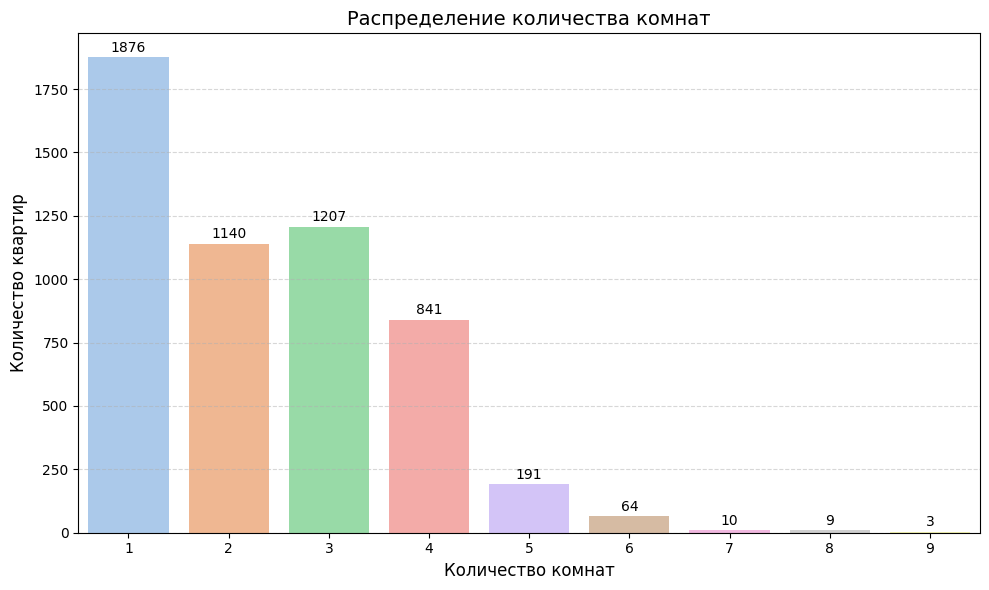

In [ ]:
# Распределение количества комнат
plt.figure(figsize=(10, 6))

# Сортировка по количеству комнат
sns.countplot(
    x='Количество комнат',
    data=df,
    order=sorted(df['Количество комнат'].dropna().unique()),
    palette='pastel'
)

plt.title('Распределение количества комнат', fontsize=14)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)

counts = df['Количество комнат'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

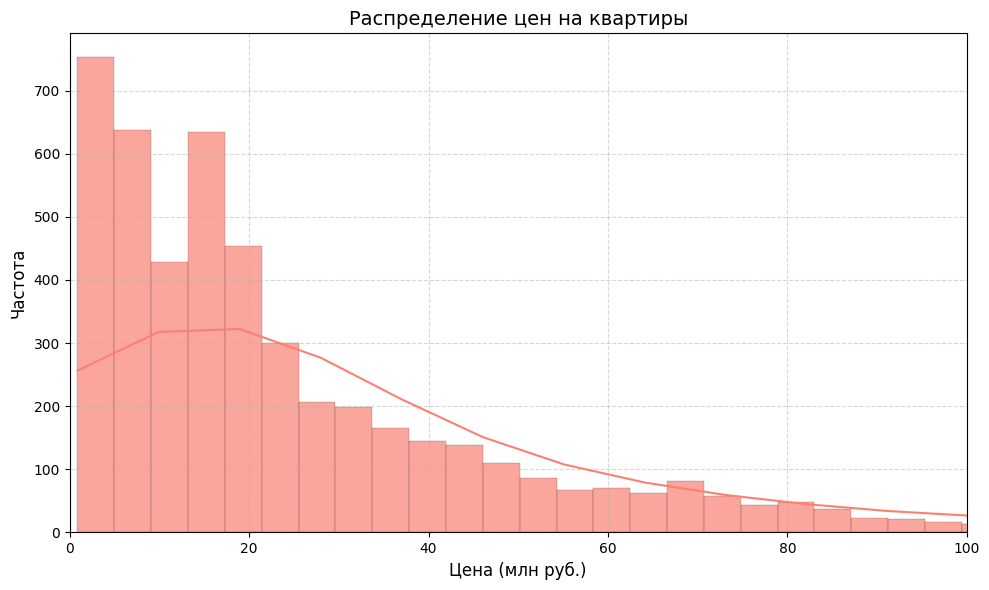

In [ ]:
# Распределение цен

# Колонка с ценой в миллионах рублей
df['Цена_млн'] = df['Цена'] / 1e6

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x='Цена_млн',
    bins='auto',
    kde=True,
    color='salmon',
    edgecolor='black',
    alpha=0.7
)

plt.title('Распределение цен на квартиры', fontsize=14)
plt.xlabel('Цена (млн руб.)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Ограничим ось X для визуализации основной массы
plt.xlim(0, 100)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

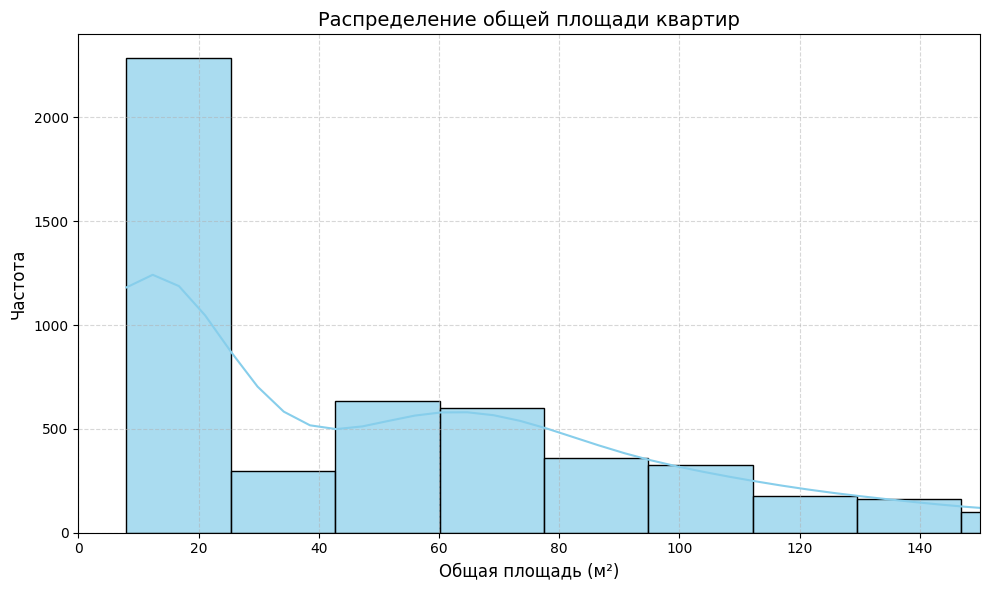

In [ ]:
# Распределение общей площади

plt.figure(figsize=(10, 6))

# Гистограмма + KDE
sns.histplot(
    data=df,
    x='Общая площадь',
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

plt.title('Распределение общей площади квартир', fontsize=14)
plt.xlabel('Общая площадь (м²)', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.xlim(0, 150)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

### Анализ зависимости цены от площади и количества комнат

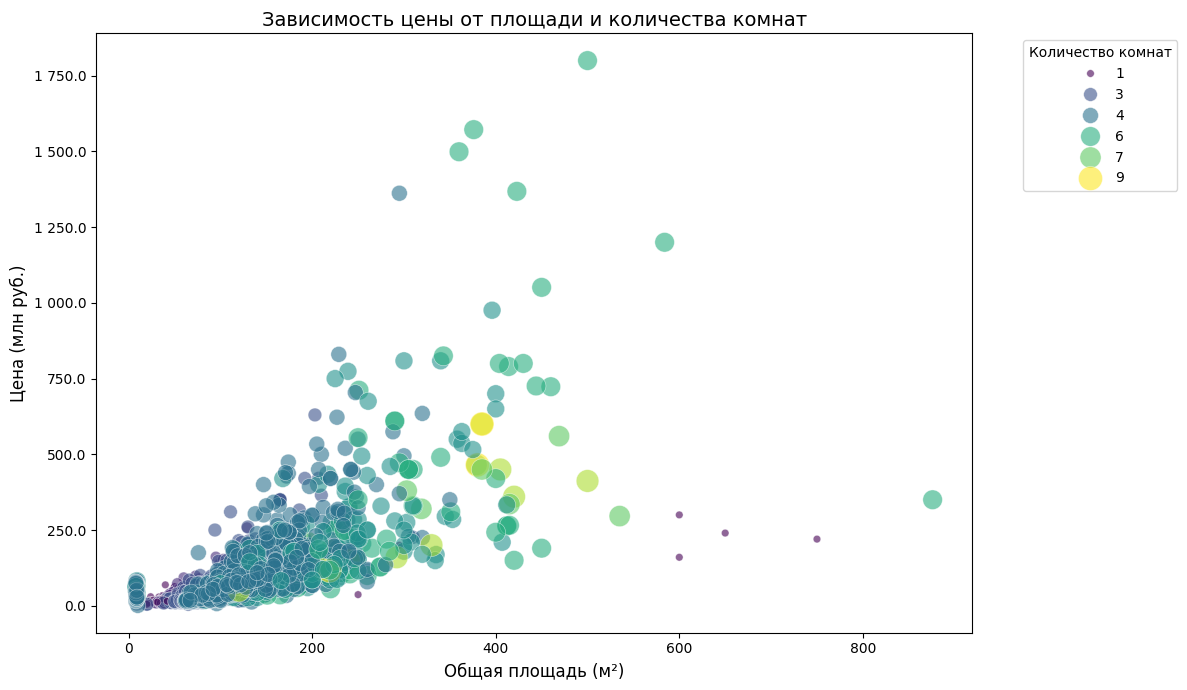

In [ ]:
# Зависимость цены от площади

# Переводим цену в миллионы рублей
df['Цена_млн'] = df['Цена'] / 1e6

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Общая площадь',
    y='Цена_млн',
    hue='Количество комнат',
    size='Количество комнат',
    alpha=0.6,
    sizes=(30, 300),
    palette='viridis',
    data=df
)

plt.title('Зависимость цены от площади и количества комнат', fontsize=14)
plt.xlabel('Общая площадь (м²)', fontsize=12)
plt.ylabel('Цена (млн руб.)', fontsize=12)

# Форматирование оси Y
scatter.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.1f}'.replace(',', ' ')))

plt.legend(title='Количество комнат', bbox_to_anchor=(1.05, 1), loc='upper left')  # убираем наложение
plt.tight_layout()
plt.show()

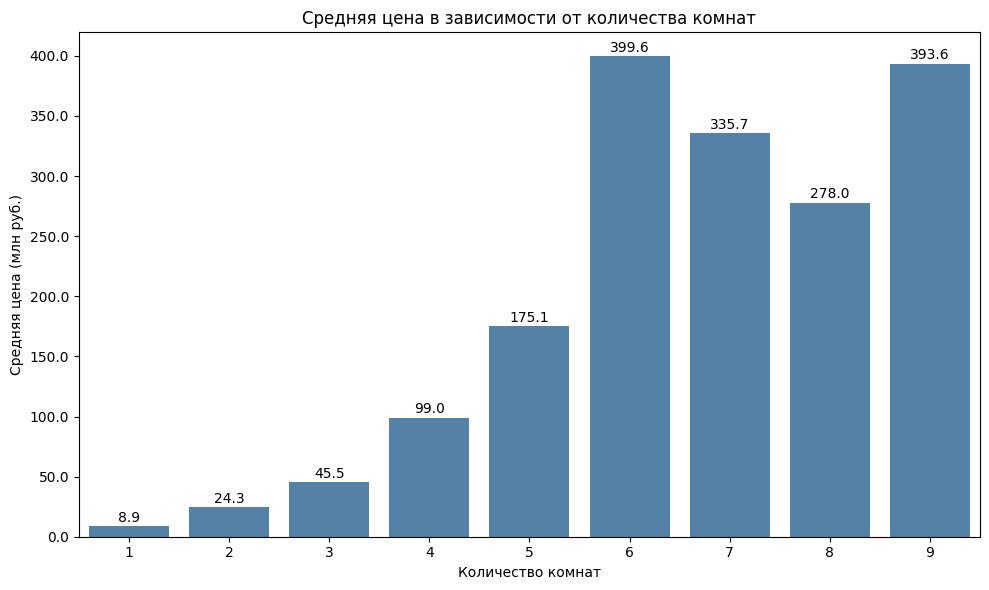

In [ ]:
# Средняя цена в зависимости от количества комнат

# Группируем данные и пересчитываем цену в миллионах рублей
avg_price_by_rooms = df.groupby('Количество комнат')['Цена'].mean().reset_index()
avg_price_by_rooms['Цена'] = avg_price_by_rooms['Цена'] / 1e6  # переводим в миллионы

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Количество комнат', y='Цена', data=avg_price_by_rooms, color='steelblue')

plt.title('Средняя цена в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (млн руб.)')

# Форматируем ось Y с разделением тысяч
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.1f}'.replace(',', ' ')))

for i, row in avg_price_by_rooms.iterrows():
    ax.text(i, row['Цена'] + 1, f'{row["Цена"]:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Анализ корреляций между числовыми признаками:

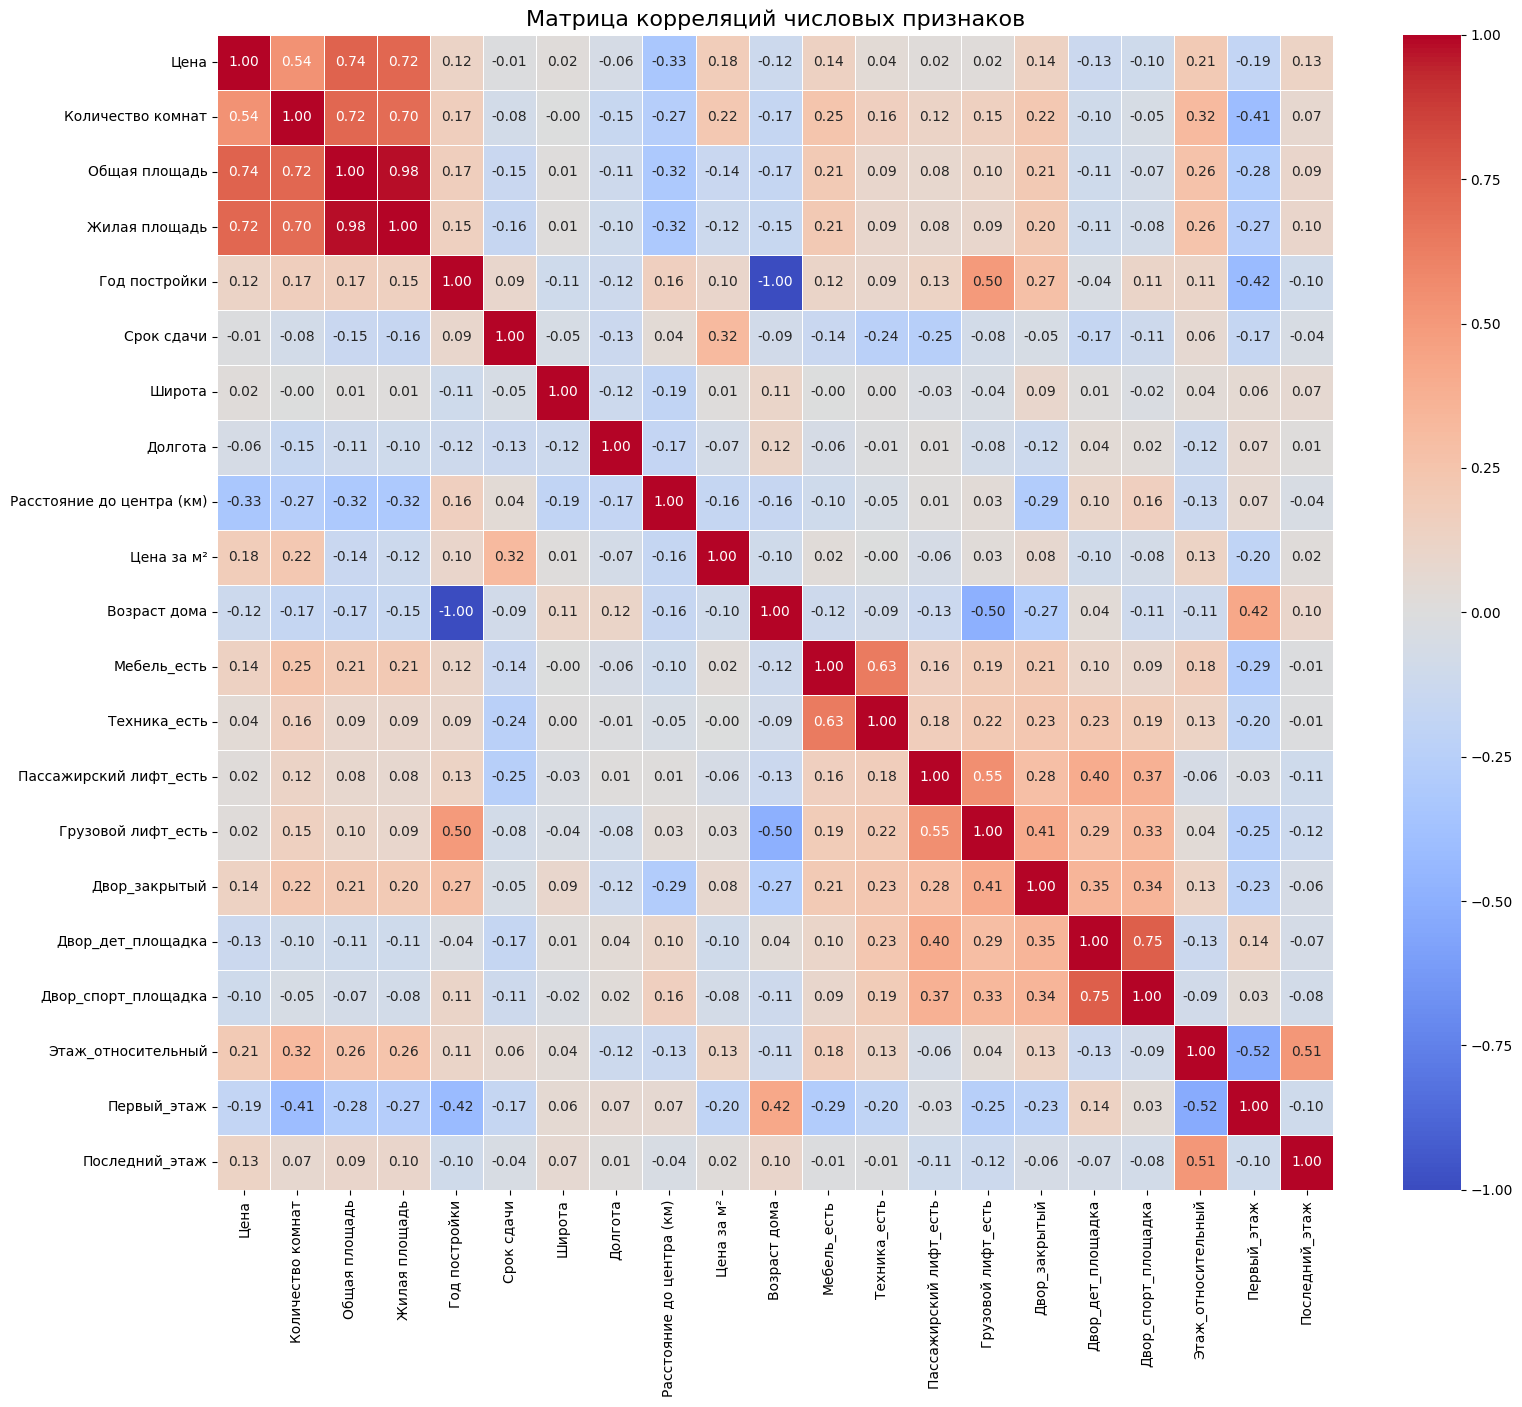


Топ корреляций с 'Цена':
Цена                  1.000000
Общая площадь         0.740304
Жилая площадь         0.722891
Количество комнат     0.536706
Этаж_относительный    0.205875
Цена за м²            0.180326
Мебель_есть           0.141651
Двор_закрытый         0.139492
Последний_этаж        0.131297
Год постройки         0.123122
Name: Цена, dtype: float64

Топ корреляций с 'Цена за м²':
Цена за м²            1.000000
Срок сдачи            0.315438
Количество комнат     0.219669
Цена                  0.180326
Этаж_относительный    0.125724
Год постройки         0.101371
Двор_закрытый         0.075353
Грузовой лифт_есть    0.029870
Мебель_есть           0.023736
Последний_этаж        0.018706
Name: Цена за м², dtype: float64


In [ ]:
# Выбираем только числовые столбцы для корреляционной матрицы
numeric_df = df.select_dtypes(include=np.number)

if 'Цена_млн' in numeric_df.columns:
    numeric_df_corr = numeric_df.drop(columns=['Цена_млн'])
else:
    numeric_df_corr = numeric_df

plt.figure(figsize=(18, 15)) # Размер можно подобрать
correlation_matrix = numeric_df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляций числовых признаков', fontsize=16)
plt.show()

# Посмотреть топ N признаков, наиболее коррелирующих с Ценой
print("\nТоп корреляций с 'Цена':")
print(correlation_matrix['Цена'].sort_values(ascending=False).head(10)) # или .tail(10) для обратных

print("\nТоп корреляций с 'Цена за м²':")
if 'Цена за м²' in correlation_matrix.columns:
    print(correlation_matrix['Цена за м²'].sort_values(ascending=False).head(10))

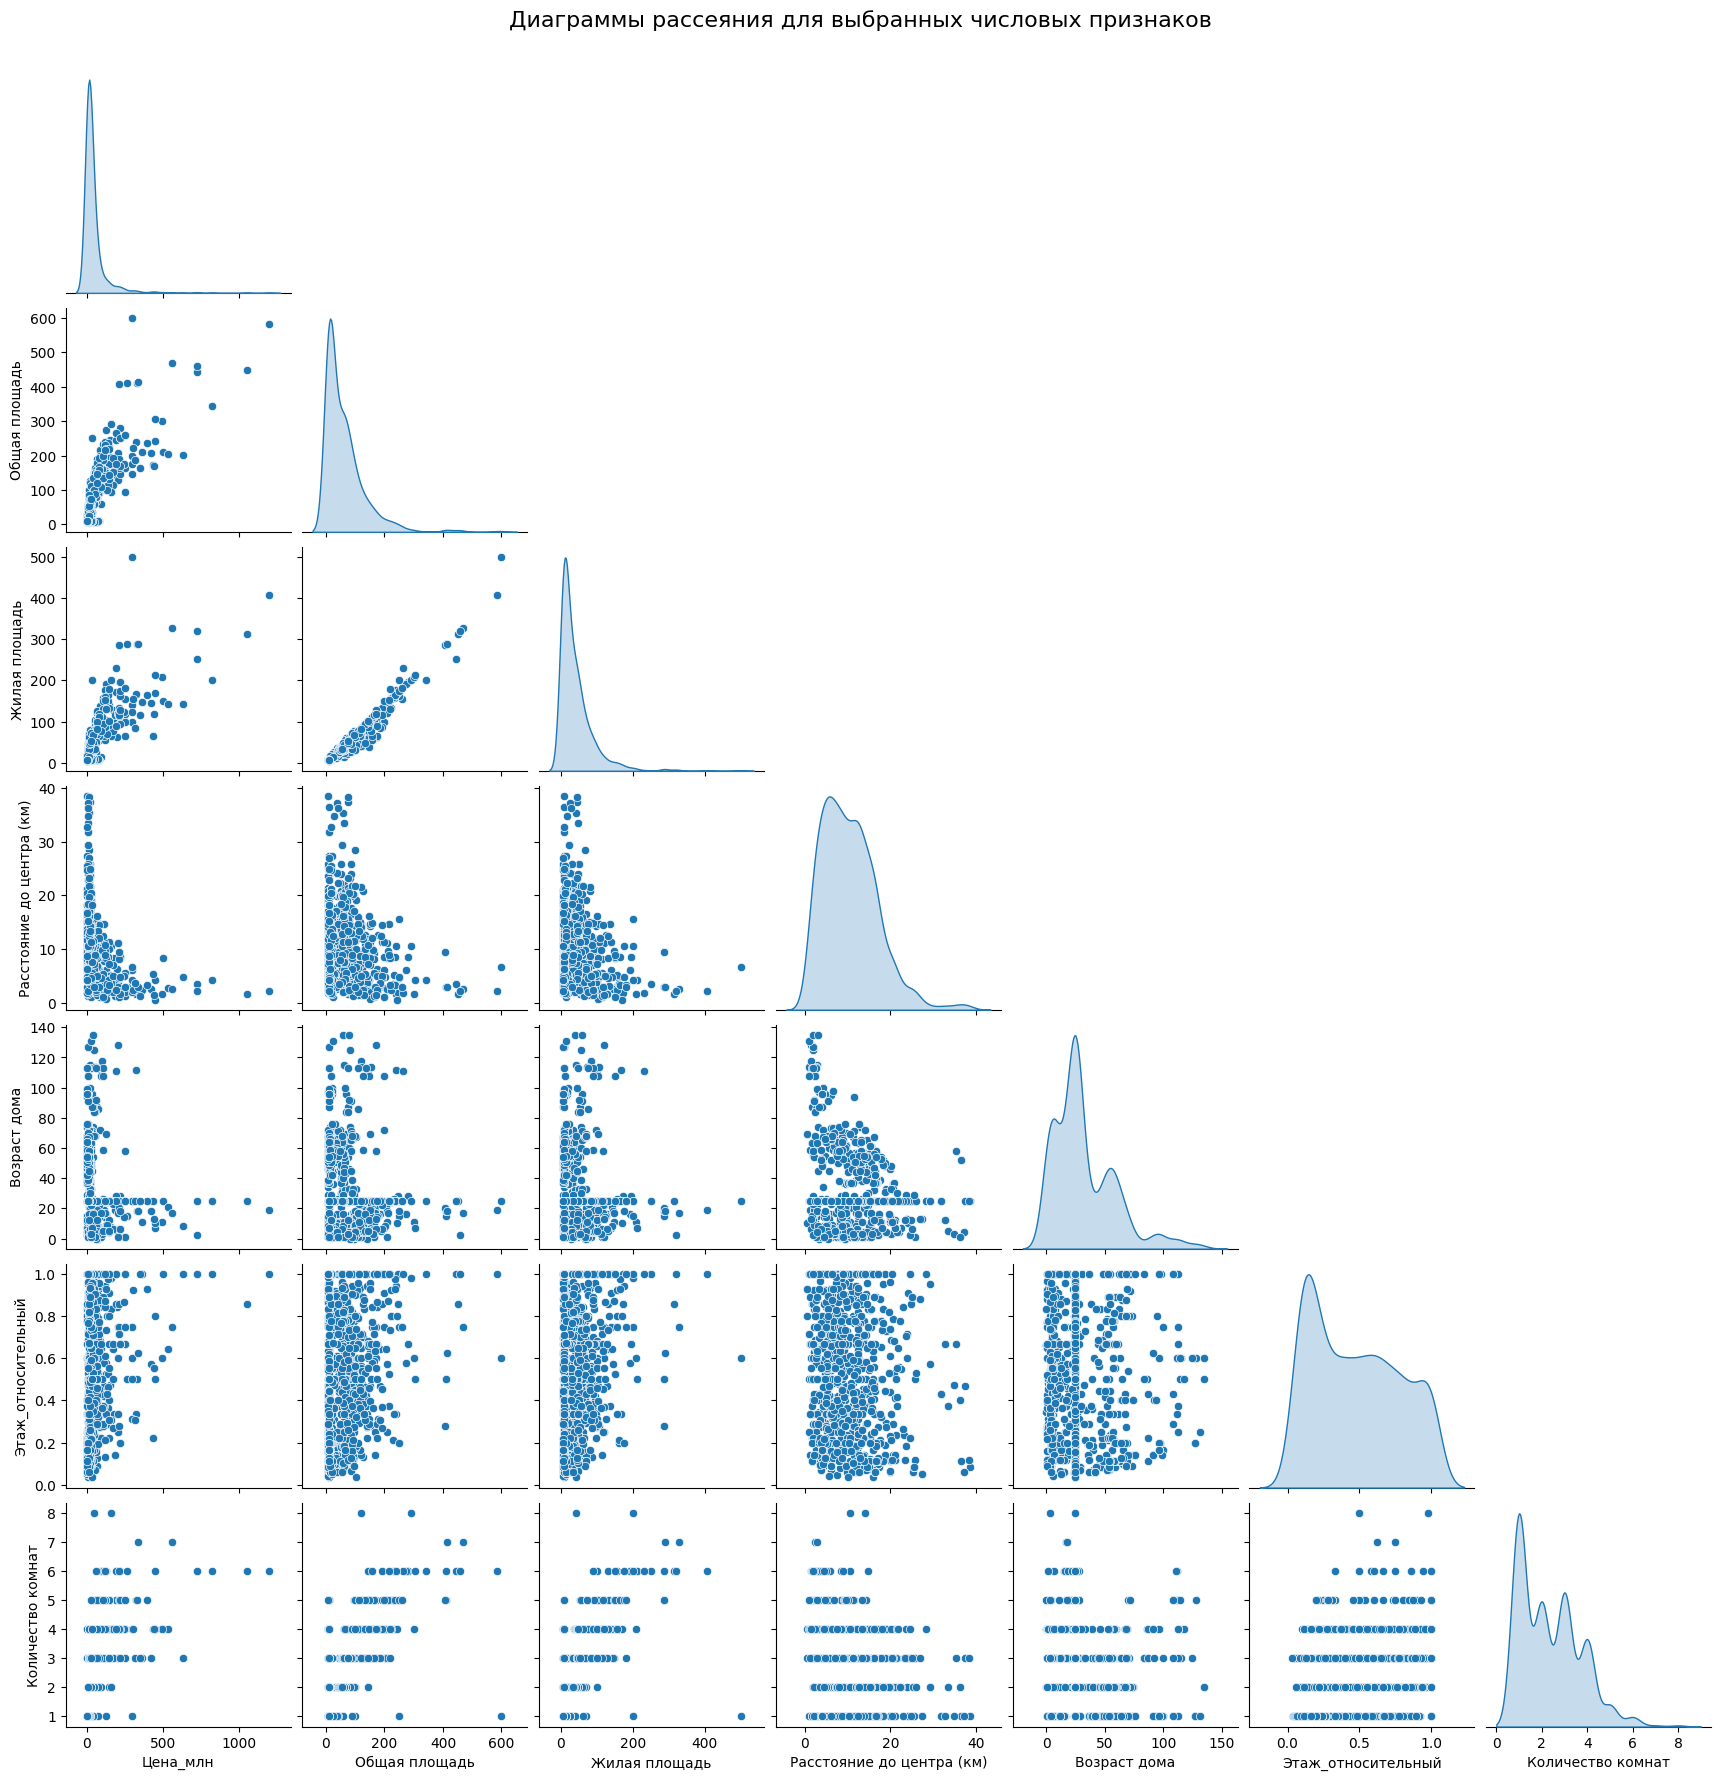

In [ ]:
cols_for_pairplot = ['Цена', 'Общая площадь', 'Жилая площадь', 'Расстояние до центра (км)', 'Возраст дома', 'Этаж_относительный']
# Добавим 'Количество комнат', т.к. это важный признак
if 'Количество комнат' in df.columns:
    cols_for_pairplot.append('Количество комнат')

existing_cols_for_pairplot = [col for col in cols_for_pairplot if col in df.columns]

if existing_cols_for_pairplot:
    # Для удобства можно снова использовать 'Цена_млн' для pairplot
    df_pairplot = df[existing_cols_for_pairplot].copy()
    if 'Цена' in df_pairplot.columns:
         df_pairplot['Цена_млн'] = df_pairplot['Цена'] / 1e6
         # Если есть 'Цена_млн', используем ее вместо 'Цена' для лучшей визуализации
         if 'Цена_млн' in df_pairplot.columns:
             plot_cols_final = [col if col != 'Цена' else 'Цена_млн' for col in existing_cols_for_pairplot]
             df_pairplot = df_pairplot[plot_cols_final]


    sample_df_for_pairplot = df_pairplot.sample(min(len(df_pairplot), 1000))

    sns.pairplot(sample_df_for_pairplot, diag_kind='kde', corner=True) # corner=True для отображения только нижней половины
    plt.suptitle('Диаграммы рассеяния для выбранных числовых признаков', y=1.02, fontsize=16)
    plt.show()
else:
    print("Нет подходящих столбцов для pairplot.")

### Анализ влияния категориальных (теперь OHE) признаков на цену:


Анализ влияния бинарных/OHE признаков на 'Цена_млн':


<ipython-input-388-66d8bca21a03>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(int), y=df[price_col_to_use], palette="pastel", showfliers=False) # showfliers=False чтобы скрыть выбросы на boxplot
<ipython-input-388-66d8bca21a03>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(int), y=df[price_col_to_use], palette="pastel", showfliers=False) # showfliers=False чтобы скрыть выбросы на boxplot
<ipython-input-388-66d8bca21a03>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col].astype(int), y=df[pr

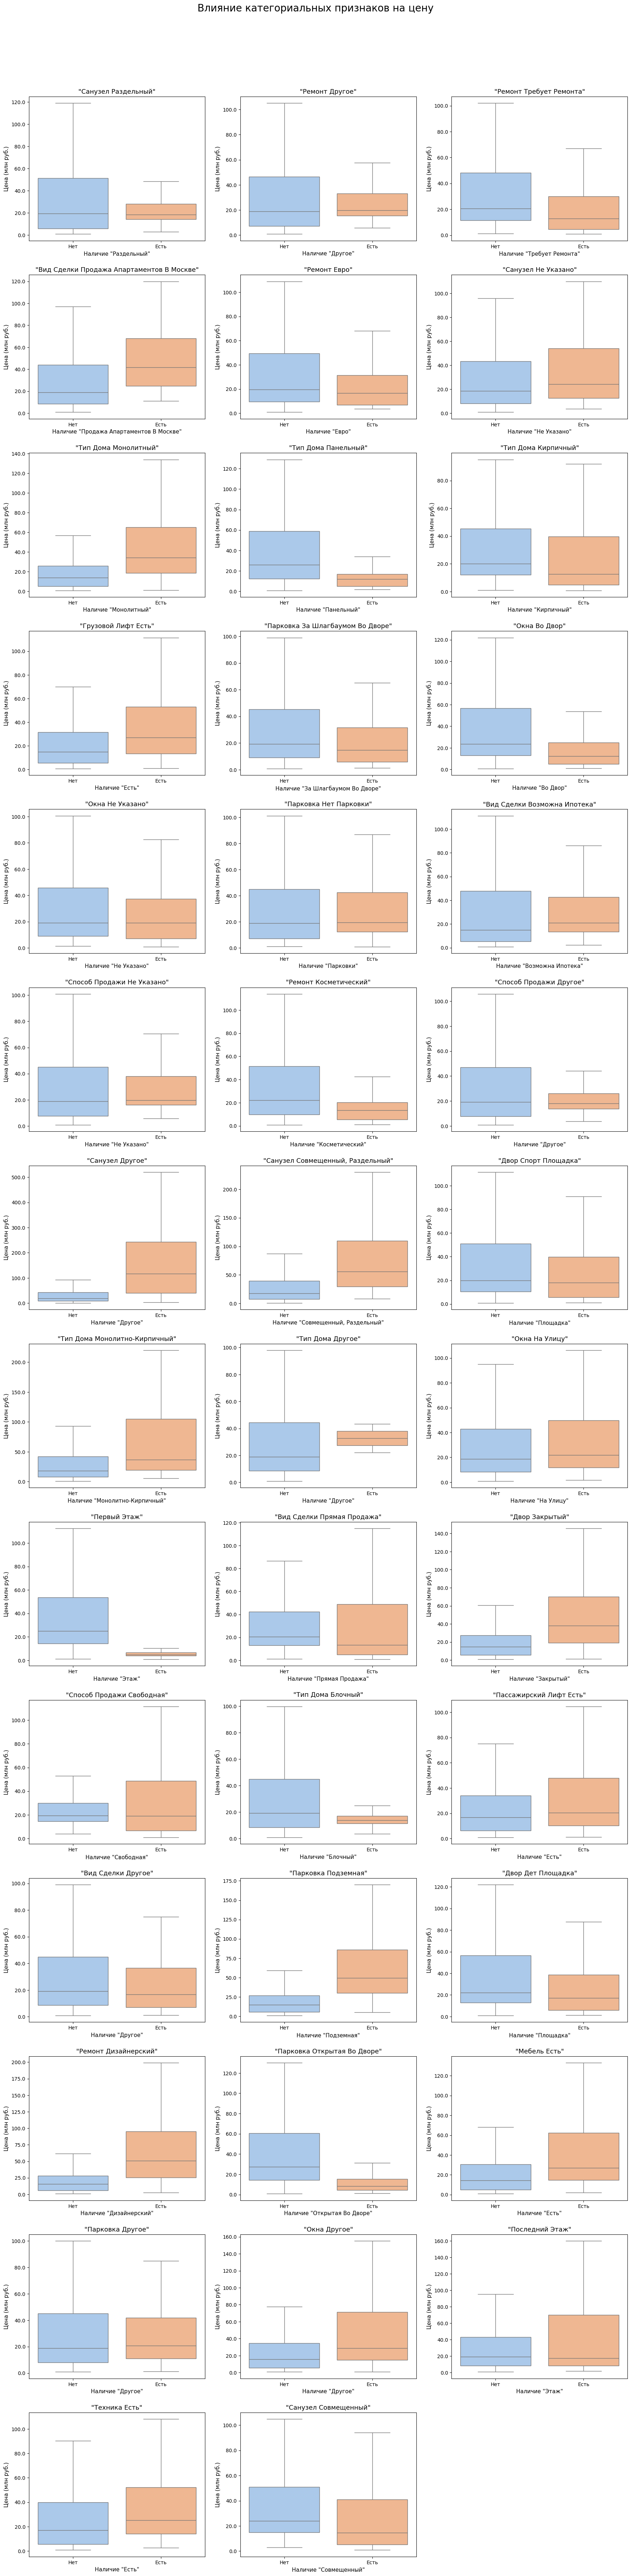

In [ ]:
# --- 2. Анализ влияния категориальных (теперь OHE) признаков на цену ---
if df.shape[0] > 0:
    # Собираем все OHE-столбцы и другие бинарные признаки для анализа
    categorical_features_to_analyze = [
        'Первый_этаж', 'Последний_этаж', 'Мебель_есть', 'Техника_есть',
        'Пассажирский лифт_есть', 'Грузовой лифт_есть',
        'Двор_закрытый', 'Двор_дет_площадка', 'Двор_спорт_площадка'
    ]
    # Добавляем OHE столбцы
    ohe_prefixes = ['санузел_', 'окна_', 'ремонт_', 'тип_дома_', 'парковка_', 'вид_сделки_', 'способ_продажи_']
    for prefix in ohe_prefixes:
        categorical_features_to_analyze.extend([col for col in df.columns if col.startswith(prefix) and df[col].nunique() == 2]) # Только бинарные OHE

    # Оставляем только существующие в df и уникальные
    categorical_features_to_analyze = list(set([col for col in categorical_features_to_analyze if col in df.columns]))


    price_col_to_use = 'Цена_млн' if 'Цена_млн' in df.columns else 'Цена'
    if price_col_to_use == 'Цена' and 'Цена_млн' not in df.columns:
        df['Цена_млн_temp'] = df['Цена'] / 1e6
        price_col_to_use = 'Цена_млн_temp'

    if not categorical_features_to_analyze:
        print("Не найдены категориальные/OHE признаки для анализа влияния на цену.")
    else:
        print(f"\nАнализ влияния бинарных/OHE признаков на '{price_col_to_use}':")

        num_features = len(categorical_features_to_analyze)

        cols_plot = 3
        rows_plot = (num_features + cols_plot - 1) // cols_plot

        plt.figure(figsize=(cols_plot * 6, rows_plot * 5))

        for i, col in enumerate(categorical_features_to_analyze):
            if df[col].nunique() <= 1: # Пропускаем столбцы с одним уникальным значением
                print(f"Столбец {col} имеет одно уникальное значение или пуст, пропускаем.")
                continue

            plt.subplot(rows_plot, cols_plot, i + 1)
            sns.boxplot(x=df[col].astype(int), y=df[price_col_to_use], palette="pastel", showfliers=False) # showfliers=False чтобы скрыть выбросы на boxplot
            plt.title(f'"{col.replace("_", " ").title()}"', fontsize=13)
            plt.xlabel(f'Наличие "{col.split("_")[-1].title()}"', fontsize=11)
            plt.ylabel('Цена (млн руб.)' if 'млн' in price_col_to_use else 'Цена (руб.)', fontsize=11)
            plt.xticks([0, 1], ['Нет', 'Есть'])
            plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.1f}'.replace(',', ' ')))

        plt.tight_layout(pad=2.0)
        plt.suptitle('Влияние категориальных признаков на цену', fontsize=20, y=1.03)
        plt.show()

    if 'Цена_млн_temp' in df.columns:
        df.drop(columns=['Цена_млн_temp'], inplace=True)

else:
    print("DataFrame пуст, анализ категориальных признаков невозможен.")

### Анализ отдельных признаков:

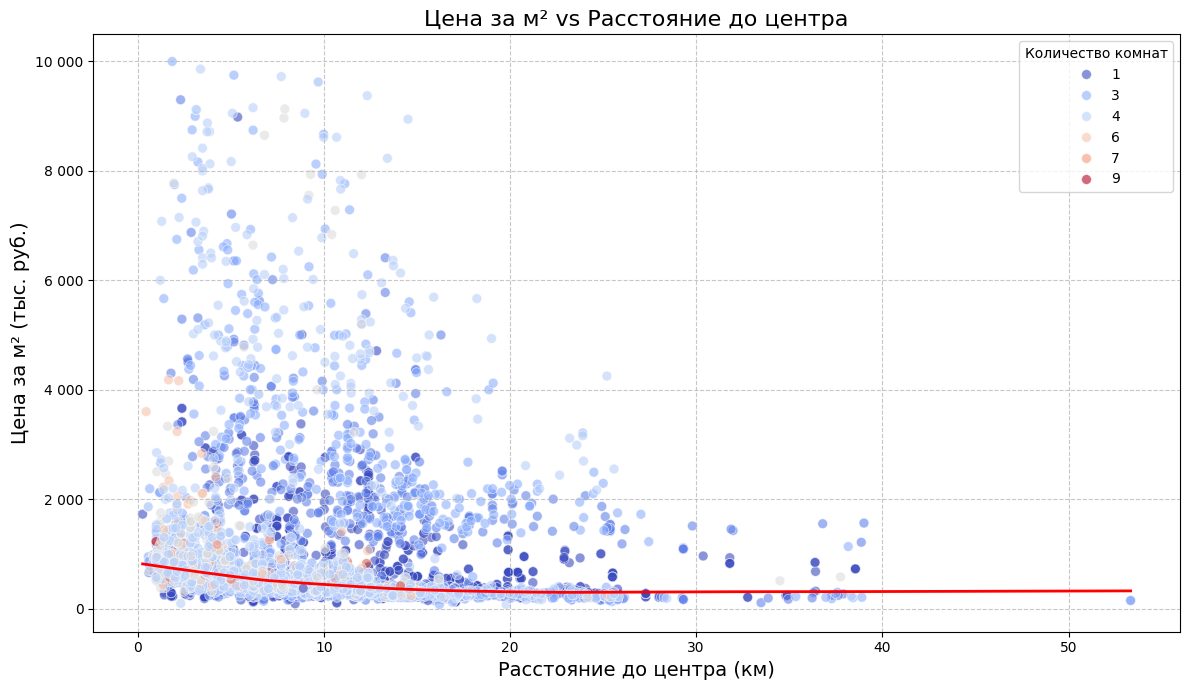

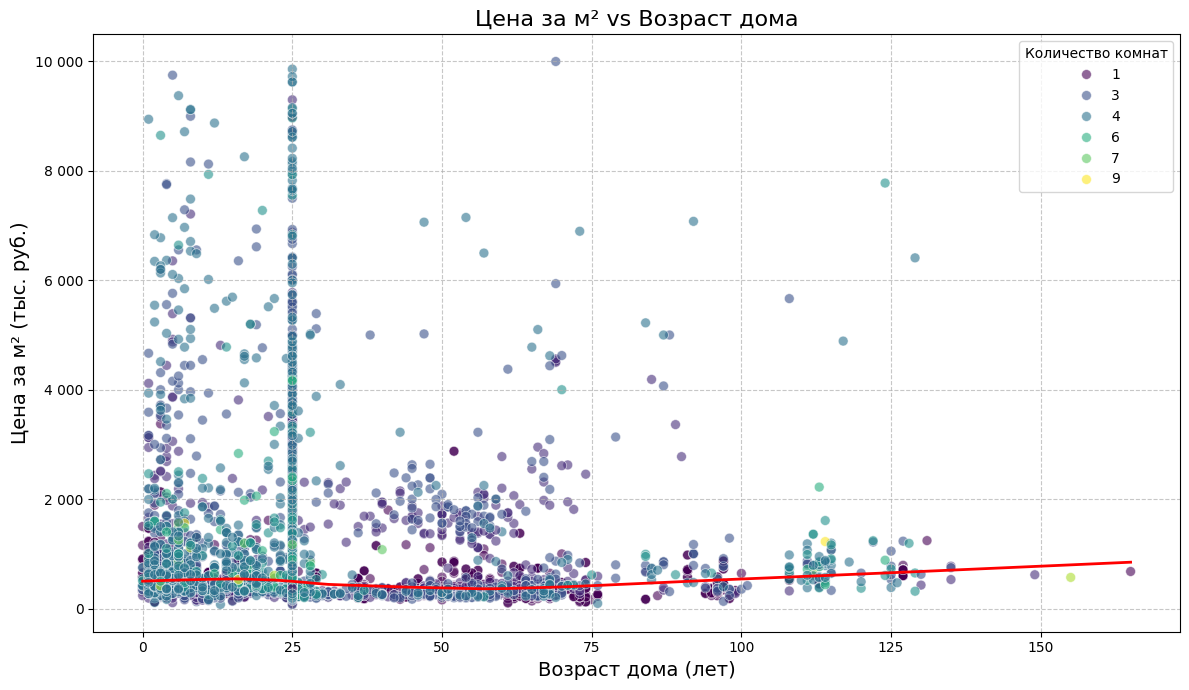

In [ ]:
# --- 3. Глубокий анализ отдельных признаков ---
if df.shape[0] > 0:
    # 'Расстояние до центра (км)' vs 'Цена за м²'
    if 'Расстояние до центра (км)' in df.columns and 'Цена за м²' in df.columns:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(x='Расстояние до центра (км)', y='Цена за м²', data=df,
                        alpha=0.6, s=50, hue='Количество комнат' if 'Количество комнат' in df.columns else None,
                        palette='coolwarm', legend='auto' if 'Количество комнат' in df.columns else False)

        sns.regplot(x='Расстояние до центра (км)', y='Цена за м²', data=df, scatter=False, lowess=True, line_kws={'color':'red', 'lw':2})
        plt.title('Цена за м² vs Расстояние до центра', fontsize=16)
        plt.xlabel('Расстояние до центра (км)', fontsize=14)
        plt.ylabel('Цена за м² (тыс. руб.)', fontsize=14)
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}'.replace(',', ' ')))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 'Возраст дома' vs 'Цена за м²'
    if 'Возраст дома' in df.columns and 'Цена за м²' in df.columns:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(x='Возраст дома', y='Цена за м²', data=df,
                        alpha=0.6, s=50, hue='Количество комнат' if 'Количество комнат' in df.columns else None,
                        palette='viridis', legend='auto' if 'Количество комнат' in df.columns else False)
        sns.regplot(x='Возраст дома', y='Цена за м²', data=df, scatter=False, lowess=True, line_kws={'color':'red', 'lw':2})
        plt.title('Цена за м² vs Возраст дома', fontsize=16)
        plt.xlabel('Возраст дома (лет)', fontsize=14)
        plt.ylabel('Цена за м² (тыс. руб.)', fontsize=14)
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,}'.replace(',', ' ')))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



Статистика по новым полиномиальным признакам расстояния до центра:
                            count         mean          std       min  \
Расстояние до центра (км)  5341.0    10.593543     6.401417  0.265528   
Расстояние_центр_км_кв     5341.0   153.193633   187.517333  0.070505   
Расстояние_центр_км_куб    5341.0  2737.650798  6074.670284  0.018721   

                                  25%          50%          75%            max  
Расстояние до центра (км)    5.368991    10.015139    14.676573      53.335525  
Расстояние_центр_км_кв      28.826060   100.303000   215.401791    2844.678236  
Расстояние_центр_км_куб    154.766843  1004.548437  3161.360075  151722.407446  

Первые 5 строк с новыми признаками:
   Расстояние до центра (км)  Расстояние_центр_км_кв  Расстояние_центр_км_куб
0                   9.366059               87.723066               821.619438
1                  13.496162              182.146392              2458.277237
2                   4.872697               2

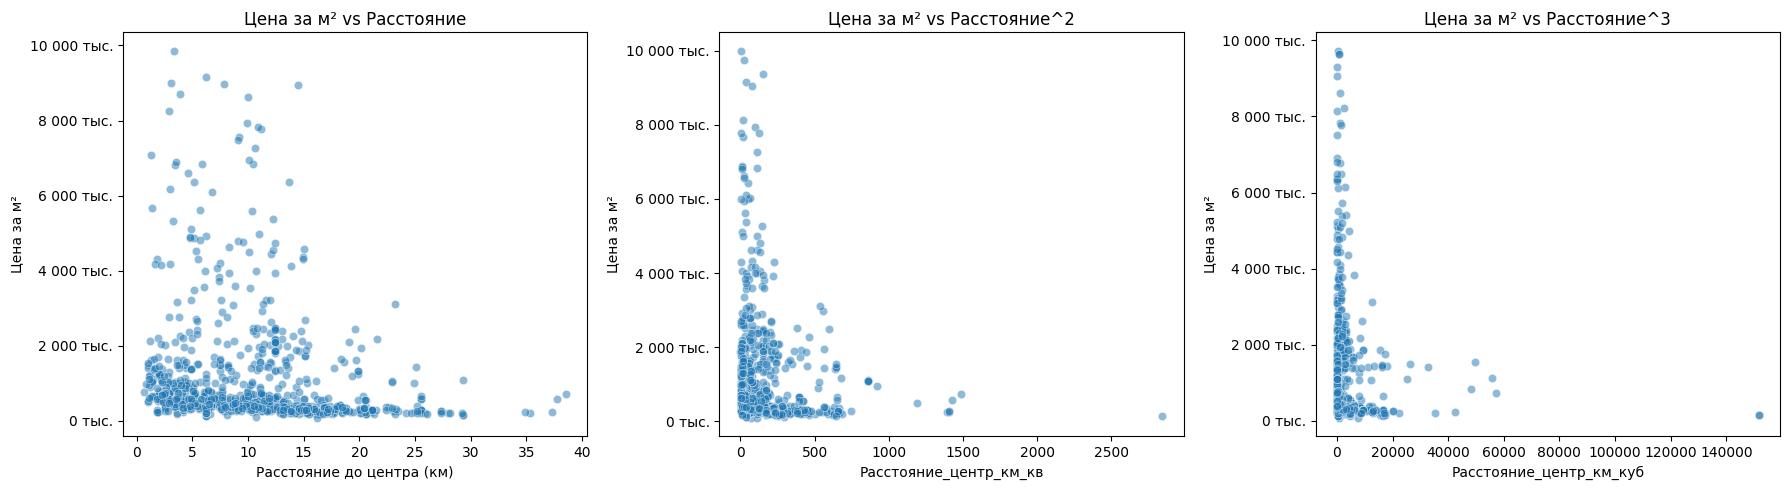

In [ ]:
# --- Создание полиномиальных признаков для 'Расстояние до центра (км)' ---

if 'Расстояние до центра (км)' in df.columns and df.shape[0] > 0:

    # Квадратичный признак
    df['Расстояние_центр_км_кв'] = df['Расстояние до центра (км)'] ** 2

    # Кубический признак
    df['Расстояние_центр_км_куб'] = df['Расстояние до центра (км)'] ** 3

    print("\nСтатистика по новым полиномиальным признакам расстояния до центра:")
    print(df[['Расстояние до центра (км)', 'Расстояние_центр_км_кв', 'Расстояние_центр_км_куб']].describe().T)

    print("\nПервые 5 строк с новыми признаками:")
    print(df[['Расстояние до центра (км)', 'Расстояние_центр_км_кв', 'Расстояние_центр_км_куб']].head())


    if 'Цена за м²' in df.columns:
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        sns.scatterplot(x='Расстояние до центра (км)', y='Цена за м²', data=df.sample(min(len(df), 1000)), alpha=0.5)
        plt.title('Цена за м² vs Расстояние')
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,} тыс.'.replace(',', ' ')))


        plt.subplot(1, 3, 2)
        sns.scatterplot(x='Расстояние_центр_км_кв', y='Цена за м²', data=df.sample(min(len(df), 1000)), alpha=0.5)
        plt.title('Цена за м² vs Расстояние^2')
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,} тыс.'.replace(',', ' ')))

        plt.subplot(1, 3, 3)
        sns.scatterplot(x='Расстояние_центр_км_куб', y='Цена за м²', data=df.sample(min(len(df), 1000)), alpha=0.5)
        plt.title('Цена за м² vs Расстояние^3')
        plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000):,} тыс.'.replace(',', ' ')))

        plt.tight_layout()
        plt.show()
else:
    print("\nСтолбец 'Расстояние до центра (км)' отсутствует или DataFrame пуст. Полиномиальные признаки не созданы.")